# ME793 Course Project
# Group 36
# **Property Prediction of High Entropy Alloys**

Archit Mundada [22B2259]\
Mokshit Naidu [200100104]\
Shiv Modi [19D100011]


ME 793 Drive Folder: https://drive.google.com/drive/folders/1_QPfisV0CJkJbhDv0TWxvDDoc4tpeSnd?usp=drive_link

Code Notebook:
https://colab.research.google.com/drive/1v6gc-kUq2TIxK5Pn8vxmpkh9ICTSeuc0?usp=sharing

All required Data and Video are in Drive Folder, you can mount this folder using drive.mount('/content/drive'), code will read data.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from google.colab import drive
from xgboost import XGBRegressor
from sklearn.feature_selection import f_regression, f_classif, mutual_info_classif, SelectFromModel, SelectKBest, chi2
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score, r2_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Importing Data from drive
## Directly use pd.read_csv if drive file is not accessible

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ME793/final_data.csv'
data = pd.read_csv(file_path)
data
corrdata = data.iloc[:, 0:14]

matrix = corrdata.corr()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Initial Data Analysis and Models

## Heatmap plot (part of initial attempt)

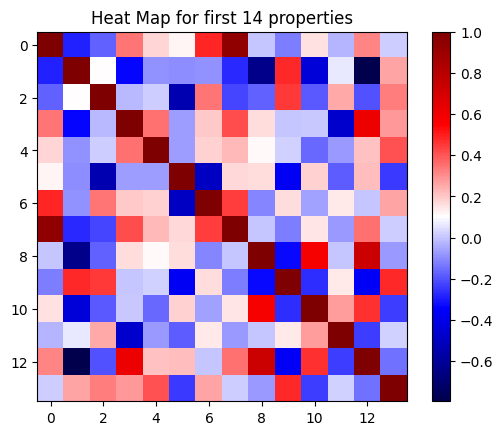

In [ ]:
plt.imshow(matrix, cmap='seismic')
#plt.xlabel('Features')
#plt.ylabel('Features')
#plt.title()

plt.colorbar()

#dataplot=sns.heatmap(corrdata.corr())

# displaying heatmap
plt.title('Heat Map for first 14 properties')
plt.show()

In [ ]:
# Split data into features (X) and target (Y)
X = data.drop(columns=['BulkModulus (GPa)', 'D_Bulk (GPa)'])
y1 = data['BulkModulus (GPa)'].values
y2 = data['D_Bulk (GPa)'].values

In [ ]:
np.array(data.columns)

array(['No', 'a (Å)', 'delta', 'Tm (K)', 'D_Tm (K)', 'Hmix (kJ/mol)',
       'σHmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'D_elec_nega',
       'VEC', 'd_VEC', 'BulkModulus (GPa)', 'D_Bulk (GPa)', 'Ag', 'Al',
       'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce',
       'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga',
       'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La',
       'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni',
       'Ns', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh',
       'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb',
       'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr', 'IMsp',
       'IMp', 'AMsp', 'AMp', 'SSsp', 'FCCp', 'B2p', 'BCCp', 'HCPp',
       '2BCCp', 'SSp', 'L12p', '2FCCp'], dtype=object)

In [ ]:
cols = np.array(X.columns)
cols

array(['No', 'a (Å)', 'delta', 'Tm (K)', 'D_Tm (K)', 'Hmix (kJ/mol)',
       'σHmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'D_elec_nega',
       'VEC', 'd_VEC', 'Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi',
       'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy',
       'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho',
       'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N',
       'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb', 'Pd',
       'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si',
       'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W',
       'Y', 'Yb', 'Zn', 'Zr', 'IMsp', 'IMp', 'AMsp', 'AMp', 'SSsp',
       'FCCp', 'B2p', 'BCCp', 'HCPp', '2BCCp', 'SSp', 'L12p', '2FCCp'],
      dtype=object)

In [ ]:
X['No']

0        2
1        2
2        2
3        2
4        2
        ..
1098     9
1099     9
1100     9
1101    10
1102    10
Name: No, Length: 1103, dtype: int64

In [ ]:
properties = ['No', 'a (Å)', 'delta', 'Tm (K)', 'D_Tm (K)', 'Hmix (kJ/mol)','σHmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'D_elec_nega', 'VEC', 'd_VEC']
atoms = ['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd',
         'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb',
         'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y', 'Yb',
         'Zn', 'Zr']
phases = ['IMsp', 'IMp', 'AMsp', 'AMp', 'SSsp', 'FCCp', 'B2p', 'BCCp', 'HCPp', '2BCCp', 'SSp', 'L12p', '2FCCp']

## F values, P values calculation (Part of initial attempt)

In [ ]:
#friction features
f_values, p_values = f_regression(X, y1)
anova_test1 = pd.DataFrame(columns=["features", "f_values", "p_values"])
anova_test1["features"] = X.columns
anova_test1["f_values"] = f_values
anova_test1["p_values"] = p_values
anova_test1 = anova_test1.sort_values(by=["f_values", "p_values"], ascending=False).reset_index(drop=True)


# Select top features
sel = SelectKBest(f_regression, k='all')
sel.fit(X, y1)
selected_feat= X.columns[(sel.get_support())]

# Add other features
features_list = selected_feat.values.tolist()
print("-------------------------------------")
print("Feature List for Friction:\n")
print(features_list)
print("-------------------------------------")
print("No of features:", len(features_list))

-------------------------------------
Feature List for Friction:

['No', 'a (Å)', 'delta', 'Tm (K)', 'D_Tm (K)', 'Hmix (kJ/mol)', 'σHmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'D_elec_nega', 'VEC', 'd_VEC', 'Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr', 'IMsp', 'IMp', 'AMsp', 'AMp', 'SSsp', 'FCCp', 'B2p', 'BCCp', 'HCPp', '2BCCp', 'SSp', 'L12p', '2FCCp']
-------------------------------------
No of features: 103


In [ ]:
anova_test1.tail(10)

features  f_values  p_values
93         K       0.0       1.0
94        Ne       0.0       1.0
95        Ns       0.0       1.0
96         O       0.0       1.0
97        Os       0.0       1.0
98        Rb       0.0       1.0
99         S       0.0       1.0
100       Se       0.0       1.0
101       Te       0.0       1.0
102       Tl       0.0       1.0

In [ ]:
anova_test1.head(10)

features     f_values       p_values
0         a (Å)  1885.752281  7.714943e-241
1     Elec_nega  1235.266947  4.480027e-182
2        Tm (K)   651.885366  2.586338e-113
3           VEC   305.140318   1.680523e-60
4          SSsp   243.778620   8.544190e-50
5   D_elec_nega   170.293873   2.700743e-36
6  Sid (kJ/mol)   157.820332   6.353583e-34
7           AMp   154.246634   3.069068e-33
8          AMsp   154.023501   3.386733e-33
9          FCCp   149.301129   2.734865e-32

In [ ]:
n = 18

bulk_modulus = data.iloc[:, 12]
D_bulk = data.iloc[:, 13]

X1 = data.iloc[:, 0:12]
X2 = data.iloc[:, 14: 106]

X = np.concatenate((X1, X2),axis=1)

X = StandardScaler().fit_transform(X)

## Multiliear Regressor with Initial approach

0.9696111839609141
0.9448657788449943


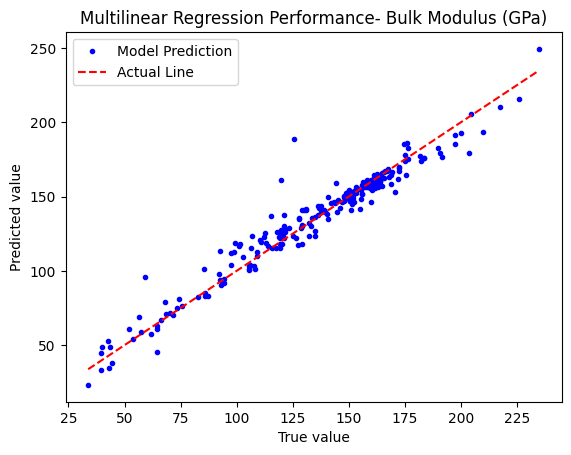

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, bulk_modulus, random_state = 189312, test_size = 0.2, shuffle=True)

regr1 = LinearRegression()
regr1.fit(X_train, Y_train)
print(regr1.score(X_train, Y_train))
print(regr1.score(X_test, Y_test))

plt.plot(Y_test, regr1.predict(X_test), 'b.', label='Model Prediction')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Actual Line')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('Multilinear Regression Performance- Bulk Modulus (GPa)')
plt.legend()
plt.show()

## PCA analysis to seek dimensions of data (Part of initial attempt)

In [ ]:
pca = PCA(n_components=n)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents)

In [ ]:
finalDf = pd.concat([principalDf, bulk_modulus], axis = 1)

In [ ]:
pca.explained_variance_ratio_

array([0.07373025, 0.05333189, 0.04311952, 0.03457896, 0.03222763,
       0.02661184, 0.02444697, 0.02390515, 0.02151954, 0.02064536,
       0.01978835, 0.01923189, 0.01835941, 0.01776069, 0.0172771 ,
       0.0166518 , 0.01562428, 0.01541968])

0.8206473611362936
0.7786150144723278


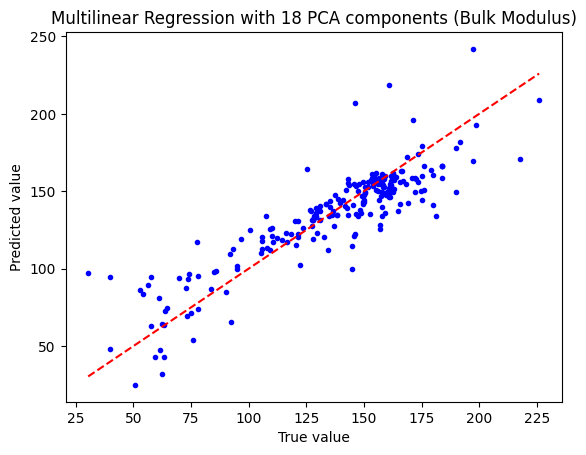

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, bulk_modulus, random_state = 1312, test_size = 0.2, shuffle=True)

regr1 = LinearRegression()
regr1.fit(X_train, Y_train)
print(regr1.score(X_train, Y_train))
print(regr1.score(X_test, Y_test))

plt.plot(Y_test, regr1.predict(X_test), 'b.')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Actual Line')
plt.title('Multilinear Regression with 18 PCA components (Bulk Modulus)')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

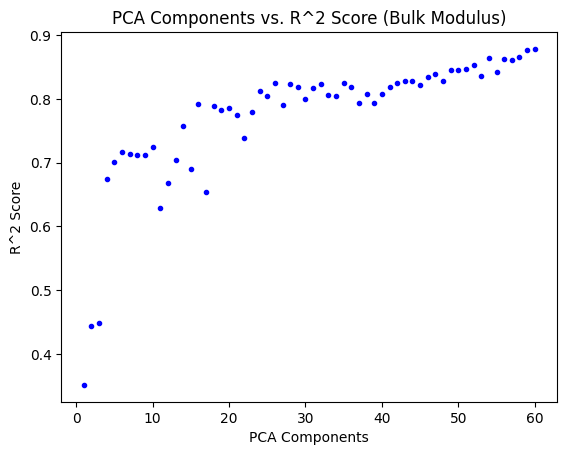

In [ ]:
for i in range(1, 61):

    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)

    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, bulk_modulus, random_state = 122123212, test_size = 0.2, shuffle=True)

    regr1 = LinearRegression()
    regr1.fit(X_train, Y_train)
    plt.plot(i, regr1.score(X_test, Y_test), 'b.')

plt.xlabel('PCA Components')
plt.ylabel('R^2 Score')
plt.title('PCA Components vs. R^2 Score (Bulk Modulus)')
plt.show()

## Random Forest Regressor (Part of Initial Attempt)

In [ ]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

Out-of-Bag Score: 0.6427636903505218
Mean Squared Error: 208.25990224226229
R-squared: 0.8704287322606532


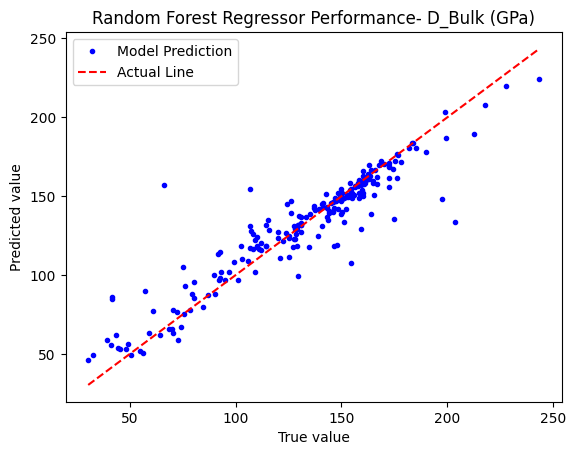

In [ ]:
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y_test, predictions)
print(f'R-squared: {r2}')

plt.plot(Y_test, predictions, 'b.', label = 'Model Prediction')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Actual Line')
plt.title('Random Forest Regressor Performance- D_Bulk (GPa)')
plt.legend()
plt.show()

# Exploratory Data Analysis (EDA) on Bulk Modulus and its Standard Deviation

In [ ]:
y_col = ['BulkModulus (GPa)', 'D_Bulk (GPa)']
# Split data into 1features (X) and target (Y)
X = data.drop(columns=y_col)
Y = data[y_col]

In [ ]:
np.array(data.columns)

array(['No', 'a (Å)', 'delta', 'Tm (K)', 'D_Tm (K)', 'Hmix (kJ/mol)',
       'σHmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'D_elec_nega',
       'VEC', 'd_VEC', 'BulkModulus (GPa)', 'D_Bulk (GPa)', 'Ag', 'Al',
       'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce',
       'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga',
       'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La',
       'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni',
       'Ns', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh',
       'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb',
       'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr', 'IMsp',
       'IMp', 'AMsp', 'AMp', 'SSsp', 'FCCp', 'B2p', 'BCCp', 'HCPp',
       '2BCCp', 'SSp', 'L12p', '2FCCp'], dtype=object)

In [ ]:
cols = np.array(X.columns)
cols

array(['No', 'a (Å)', 'delta', 'Tm (K)', 'D_Tm (K)', 'Hmix (kJ/mol)',
       'σHmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'D_elec_nega',
       'VEC', 'd_VEC', 'Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi',
       'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy',
       'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho',
       'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N',
       'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb', 'Pd',
       'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si',
       'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W',
       'Y', 'Yb', 'Zn', 'Zr', 'IMsp', 'IMp', 'AMsp', 'AMp', 'SSsp',
       'FCCp', 'B2p', 'BCCp', 'HCPp', '2BCCp', 'SSp', 'L12p', '2FCCp'],
      dtype=object)

In [ ]:
X['No']
properties = ['No', 'a (Å)', 'delta', 'Tm (K)', 'D_Tm (K)', 'Hmix (kJ/mol)','σHmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'D_elec_nega', 'VEC', 'd_VEC']
atoms = ['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd',
         'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb',
         'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y', 'Yb',
         'Zn', 'Zr']
phases = ['IMsp', 'IMp', 'AMsp', 'AMp', 'SSsp', 'FCCp', 'B2p', 'BCCp', 'HCPp', '2BCCp', 'SSp', 'L12p', '2FCCp']

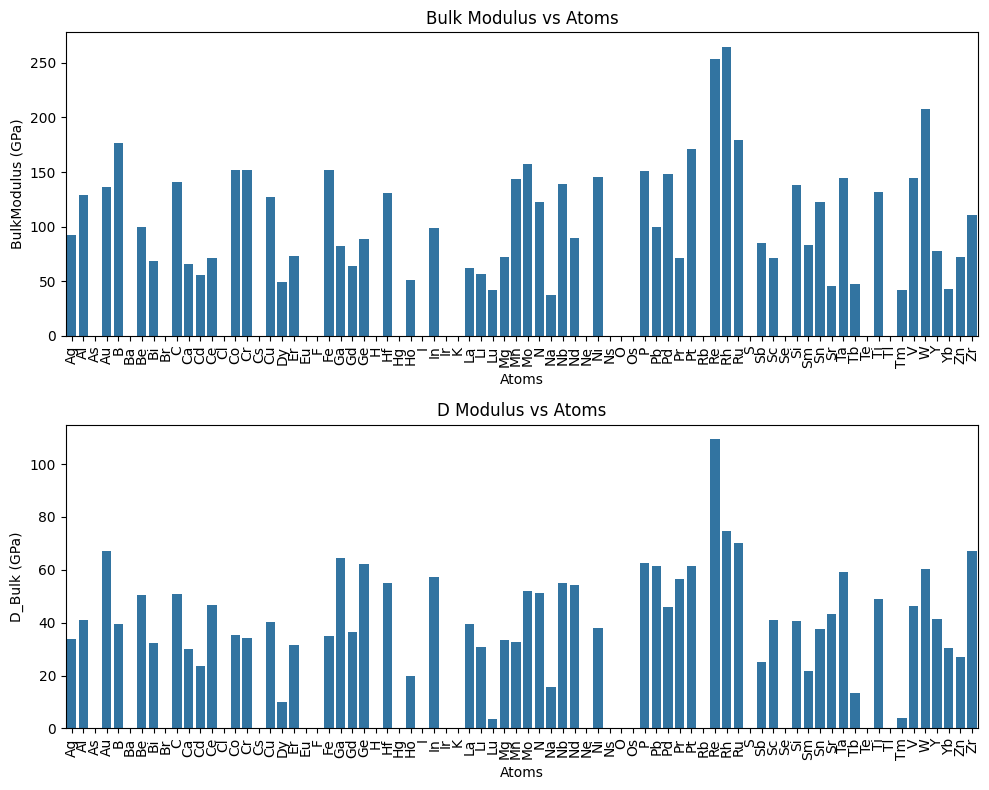

In [ ]:
b1 = []
d1 = []
for a in atoms:
    b1.append(data[data[a]>0]['BulkModulus (GPa)'].mean(axis=0))
    d1.append(data[data[a]>0]['D_Bulk (GPa)'].mean(axis=0))

dict1 = {'atom':atoms, 'BulkModulus (GPa)':b1, 'D_Bulk (GPa)': d1}
df1 = pd.DataFrame(dict1)


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot BulkModulus
sns.barplot(ax=axs[0], x='atom', y='BulkModulus (GPa)', data=df1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Atoms')
axs[0].set_ylabel('BulkModulus (GPa)')
axs[0].set_title('Bulk Modulus vs Atoms')

# Plot D_Bulk
sns.barplot(ax=axs[1], x='atom', y='D_Bulk (GPa)', data=df1)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Atoms')
axs[1].set_ylabel('D_Bulk (GPa)')
axs[1].set_title('D Modulus vs Atoms')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

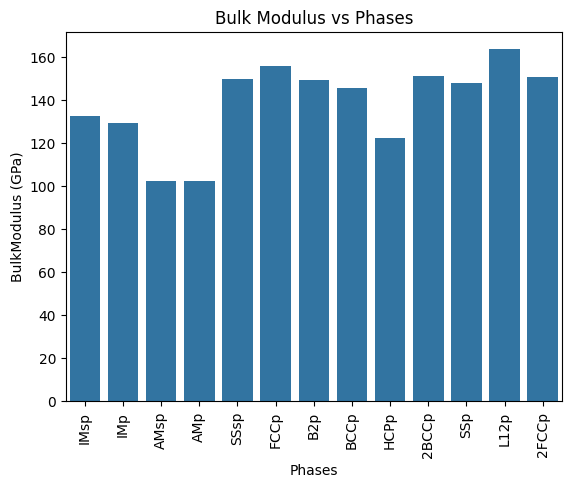

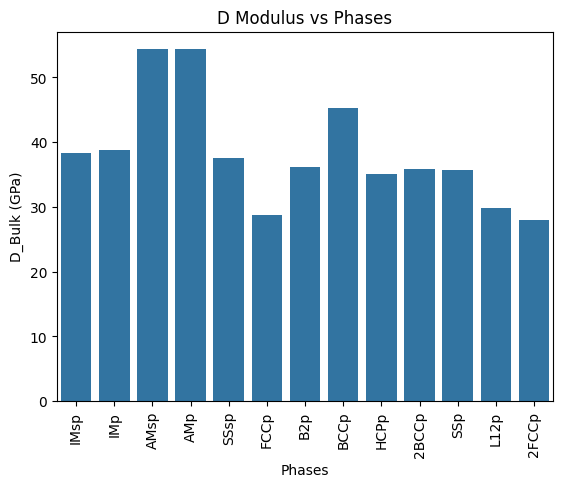

In [ ]:
b = []
d = []
for a in phases:
    b.append(data[data[a] == 1]['BulkModulus (GPa)'].mean(axis=0))
    d.append(data[data[a] == 1]['D_Bulk (GPa)'].mean(axis=0))

dict = {'phase':phases, 'BulkModulus (GPa)':b, 'D_Bulk (GPa)': d}
df = pd.DataFrame(dict)

plt.figure()
sns.barplot(x='phase', y='BulkModulus (GPa)', data=df)
plt.xticks(rotation=90)
plt.xlabel('Phases')
plt.ylabel('BulkModulus (GPa)')
plt.title('Bulk Modulus vs Phases')
plt.show()

plt.figure()
sns.barplot(x='phase', y='D_Bulk (GPa)', data=df)
plt.xticks(rotation=90)
plt.xlabel('Phases')
plt.ylabel('D_Bulk (GPa)')
plt.title('D Modulus vs Phases')
plt.show()

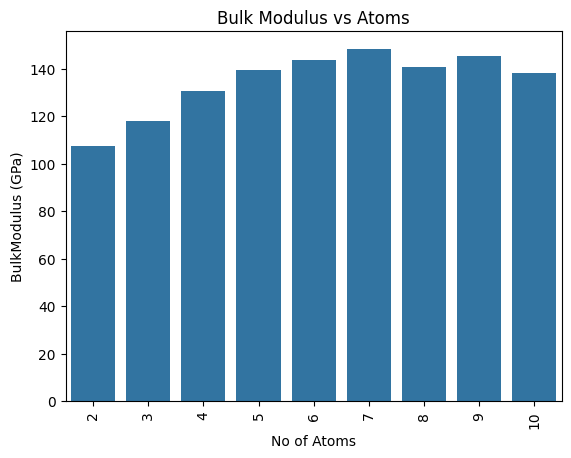

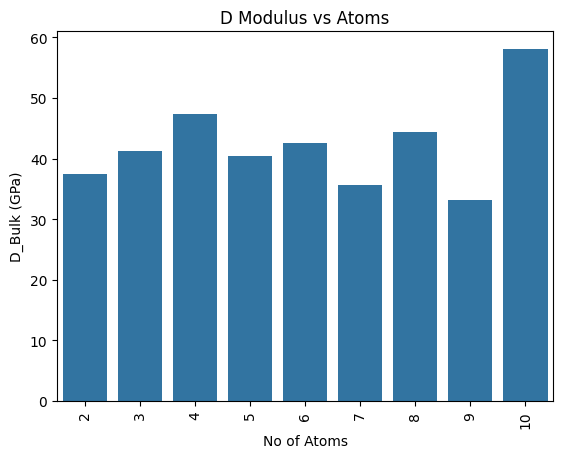

In [ ]:
b2 = []
d2 = []
num = [2,3,4,5,6,7,8,9,10]
for a in num:
    b2.append(data[data['No'] == a]['BulkModulus (GPa)'].mean(axis=0))
    d2.append(data[data['No'] == a]['D_Bulk (GPa)'].mean(axis=0))

dict2 = {'atom':num, 'BulkModulus (GPa)':b2, 'D_Bulk (GPa)': d2}
df2 = pd.DataFrame(dict2)

plt.figure()
sns.barplot(x='atom', y='BulkModulus (GPa)', data=df2)
plt.xticks(rotation=90)
plt.xlabel('No of Atoms')
plt.ylabel('BulkModulus (GPa)')
plt.title('Bulk Modulus vs Atoms')
plt.show()

plt.figure()
sns.barplot(x='atom', y='D_Bulk (GPa)', data=df2)
plt.xticks(rotation=90)
plt.xlabel('No of Atoms')
plt.ylabel('D_Bulk (GPa)')
plt.title('D Modulus vs Atoms')
plt.show()

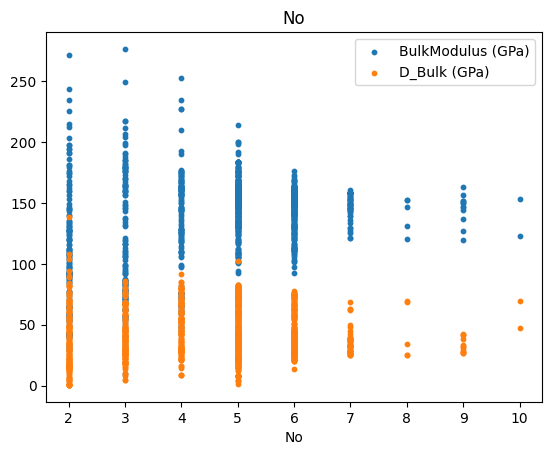

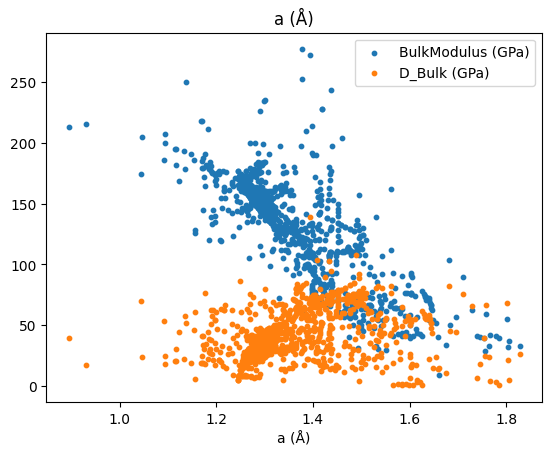

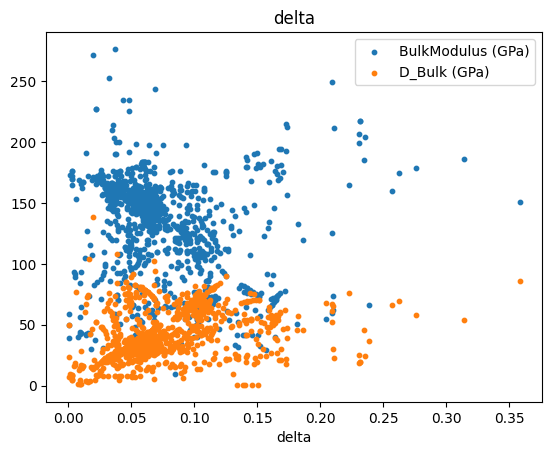

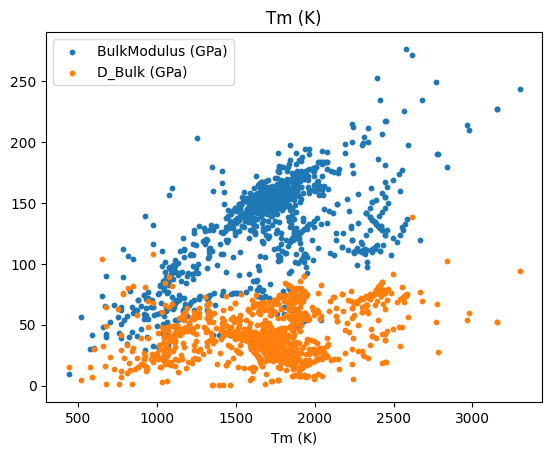

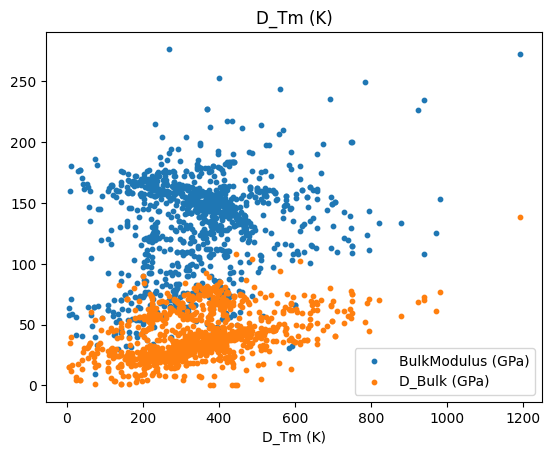

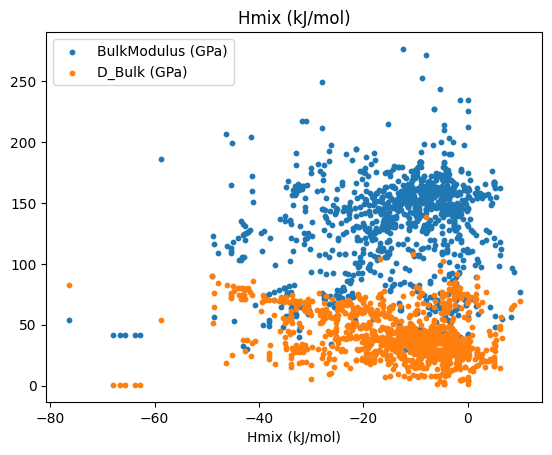

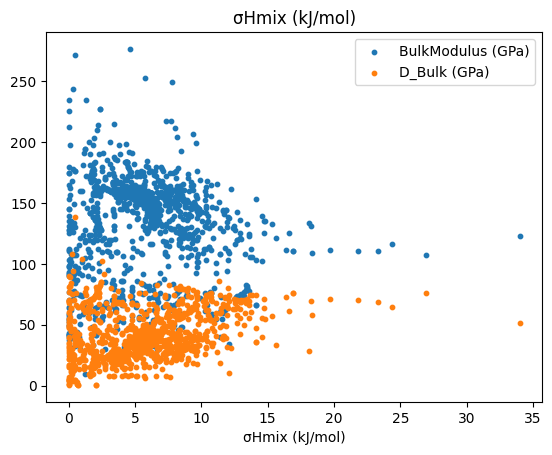

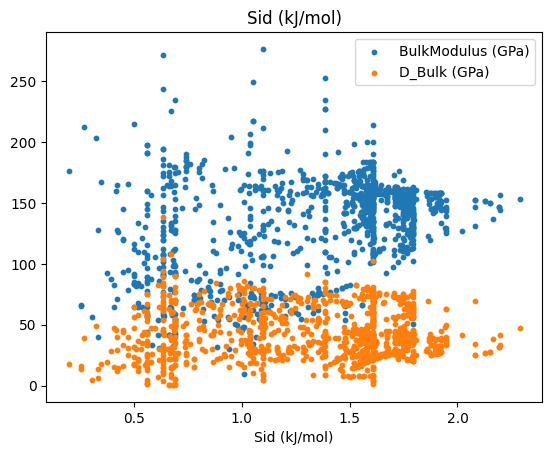

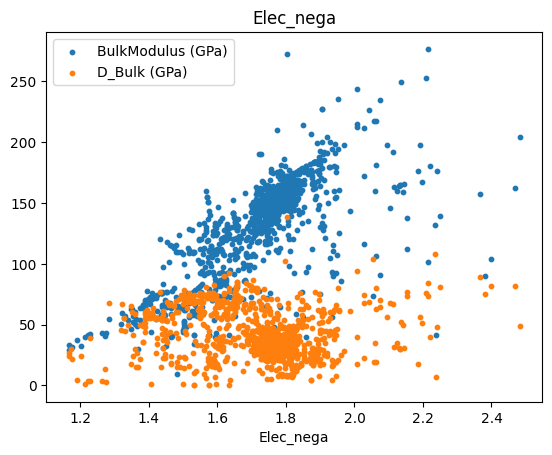

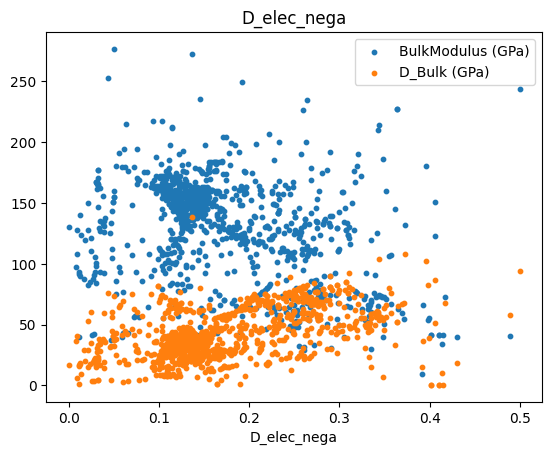

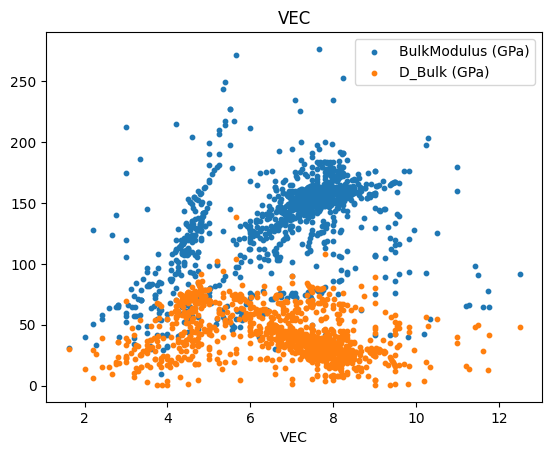

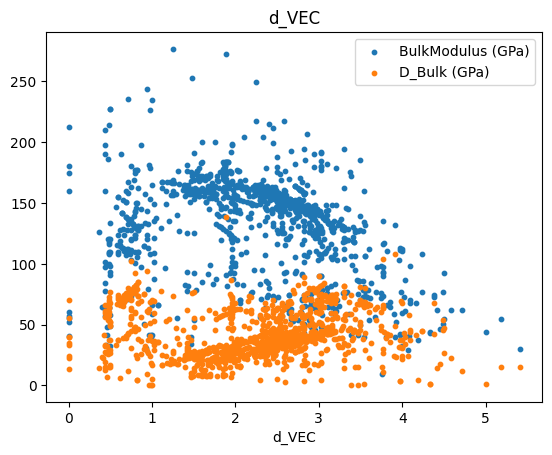

In [ ]:
for p in properties:
    plt.figure()
    for y in y_col:
        plt.scatter(data[p], data[y], s=10, label=y)
    plt.xlabel(p)
    # plt.ylabel()
    plt.title(f'{p}')
    plt.legend()
    plt.show()

#Exploratory Data Analyis on Final Six Features (Meltin temp., Enthalpy of Mixing, Entropy, Electronegativity, VEC, Bulk Modulus)

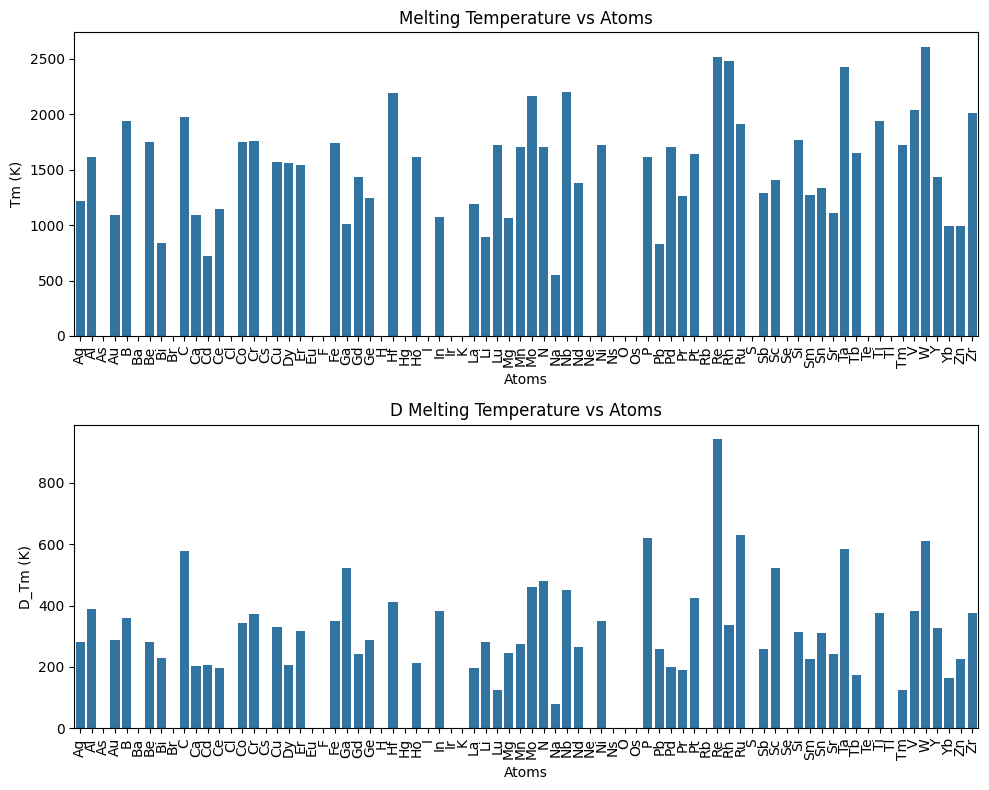

In [ ]:
b1 = []
d1 = []
for a in atoms:
    b1.append(data[data[a]>0]['Tm (K)'].mean(axis=0))
    d1.append(data[data[a]>0]['D_Tm (K)'].mean(axis=0))

dict1 = {'atom':atoms, 'Tm (K)':b1, 'D_Tm (K)': d1}
df1 = pd.DataFrame(dict1)


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot Tm
sns.barplot(ax=axs[0], x='atom', y='Tm (K)', data=df1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Atoms')
axs[0].set_ylabel('Tm (K)')
axs[0].set_title('Melting Temperature vs Atoms')

# Plot D_Tm
sns.barplot(ax=axs[1], x='atom', y='D_Tm (K)', data=df1)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Atoms')
axs[1].set_ylabel('D_Tm (K)')
axs[1].set_title('D Melting Temperature vs Atoms')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

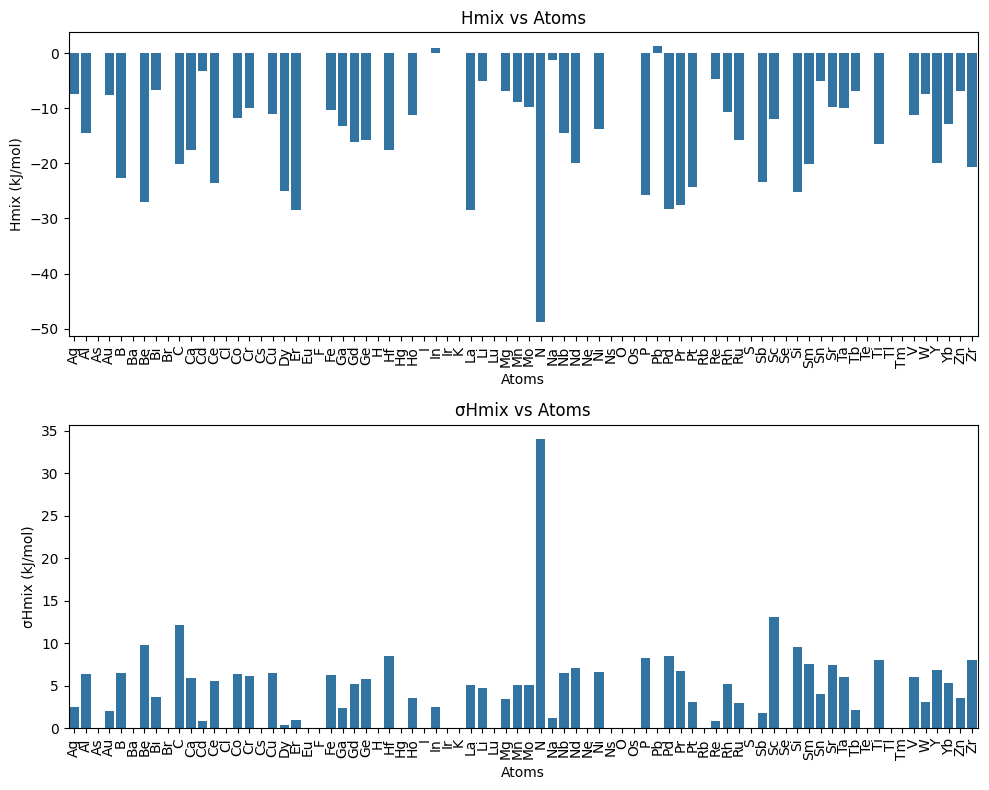

In [ ]:
b1 = []
d1 = []
for a in atoms:
    b1.append(data[data[a]>0]['Hmix (kJ/mol)'].mean(axis=0))
    d1.append(data[data[a]>0]['σHmix (kJ/mol)'].mean(axis=0))

dict1 = {'atom':atoms, 'Hmix (kJ/mol)':b1, 'σHmix (kJ/mol)': d1}
df1 = pd.DataFrame(dict1)


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot Hmix
sns.barplot(ax=axs[0], x='atom', y='Hmix (kJ/mol)', data=df1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Atoms')
axs[0].set_ylabel('Hmix (kJ/mol)')
axs[0].set_title('Hmix vs Atoms')

# Plot σHmix
sns.barplot(ax=axs[1], x='atom', y='σHmix (kJ/mol)', data=df1)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Atoms')
axs[1].set_ylabel('σHmix (kJ/mol)')
axs[1].set_title('σHmix vs Atoms')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

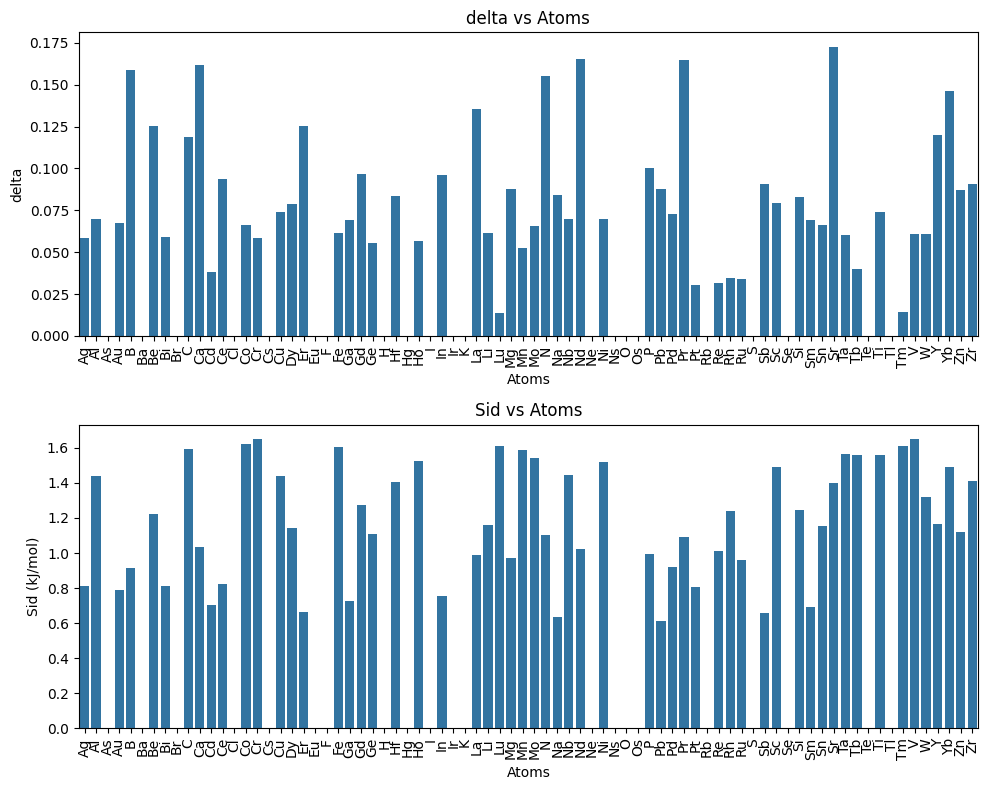

In [ ]:
b1 = []
d1 = []
for a in atoms:
    b1.append(data[data[a]>0]['delta'].mean(axis=0))
    d1.append(data[data[a]>0]['Sid (kJ/mol)'].mean(axis=0))

dict1 = {'atom':atoms, 'delta':b1, 'Sid (kJ/mol)': d1}
df1 = pd.DataFrame(dict1)


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot delta
sns.barplot(ax=axs[0], x='atom', y='delta', data=df1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Atoms')
axs[0].set_ylabel('delta')
axs[0].set_title('delta vs Atoms')

# Plot Sid
sns.barplot(ax=axs[1], x='atom', y='Sid (kJ/mol)', data=df1)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Atoms')
axs[1].set_ylabel('Sid (kJ/mol)')
axs[1].set_title('Sid vs Atoms')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

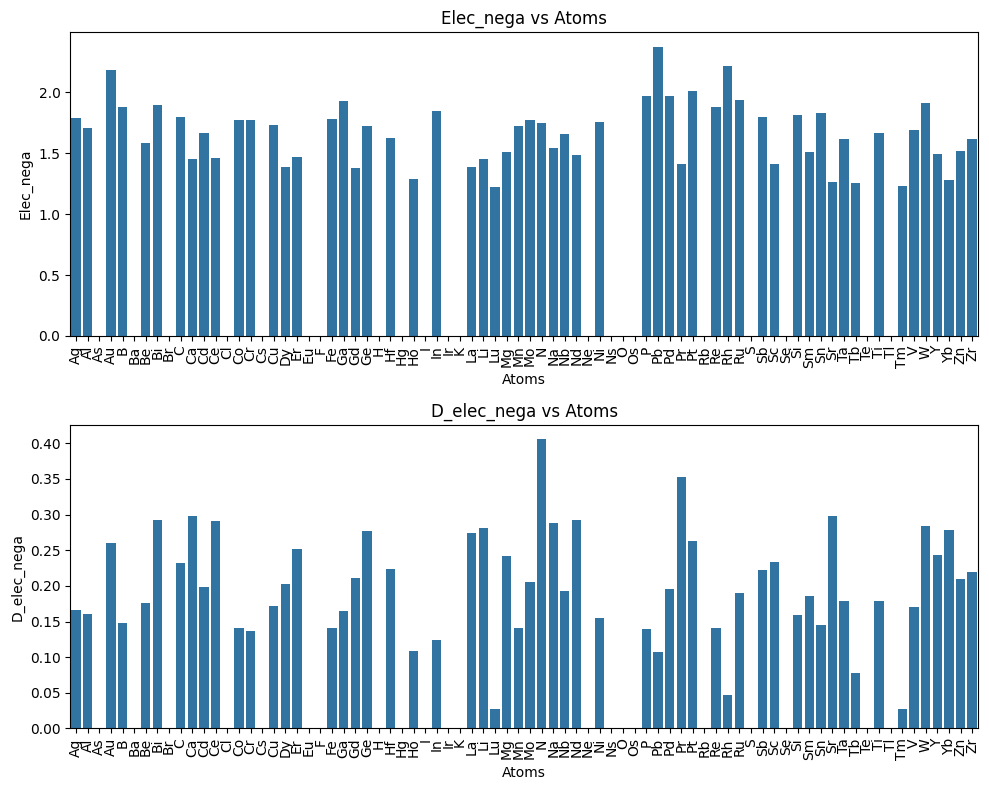

In [ ]:
b1 = []
d1 = []
for a in atoms:
    b1.append(data[data[a]>0]['Elec_nega'].mean(axis=0))
    d1.append(data[data[a]>0]['D_elec_nega'].mean(axis=0))

dict1 = {'atom':atoms, 'Elec_nega':b1, 'D_elec_nega': d1}
df1 = pd.DataFrame(dict1)


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot Elec_nega
sns.barplot(ax=axs[0], x='atom', y='Elec_nega', data=df1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Atoms')
axs[0].set_ylabel('Elec_nega')
axs[0].set_title('Elec_nega vs Atoms')

# Plot D_elec_nega
sns.barplot(ax=axs[1], x='atom', y='D_elec_nega', data=df1)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Atoms')
axs[1].set_ylabel('D_elec_nega')
axs[1].set_title('D_elec_nega vs Atoms')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

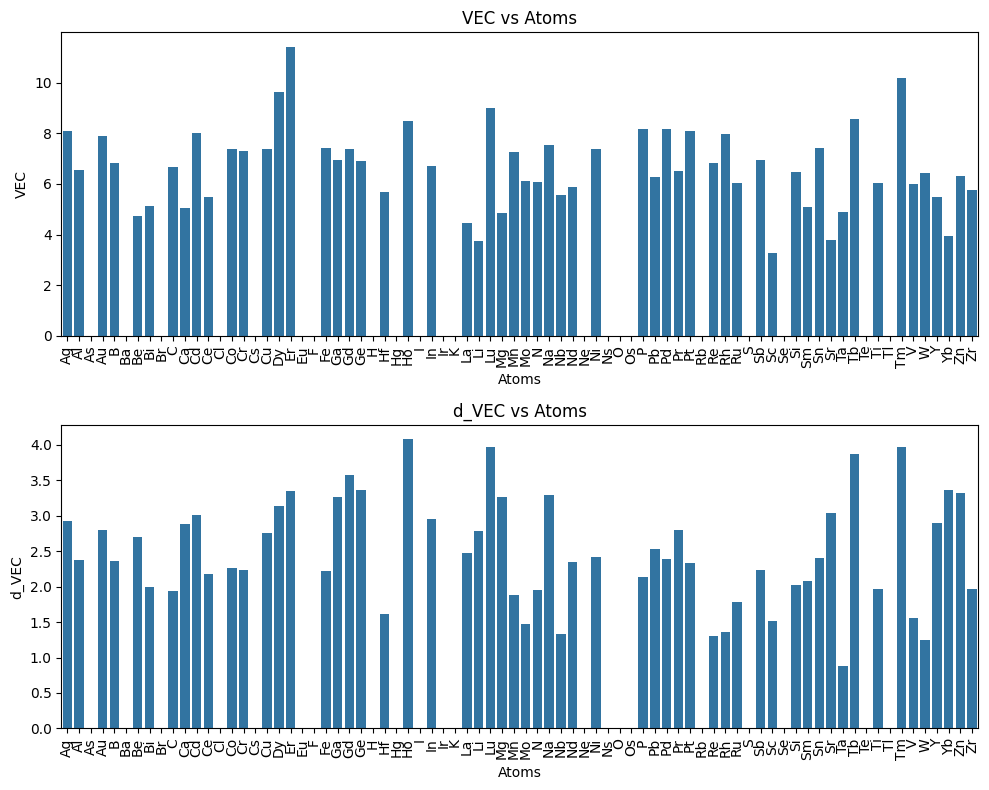

In [ ]:
b1 = []
d1 = []
for a in atoms:
    b1.append(data[data[a]>0]['VEC'].mean(axis=0))
    d1.append(data[data[a]>0]['d_VEC'].mean(axis=0))

dict1 = {'atom':atoms, 'VEC':b1, 'd_VEC': d1}
df1 = pd.DataFrame(dict1)


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot VEC
sns.barplot(ax=axs[0], x='atom', y='VEC', data=df1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Atoms')
axs[0].set_ylabel('VEC')
axs[0].set_title('VEC vs Atoms')

# Plot d_VEC
sns.barplot(ax=axs[1], x='atom', y='d_VEC', data=df1)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Atoms')
axs[1].set_ylabel('d_VEC')
axs[1].set_title('d_VEC vs Atoms')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# **Final Regression Model**
 Inspiration for change of approach: Features like Meling Temp., Hmix, etc. can't be used as input variables- these are hard to achieve. Using input variables as the no. of atoms of each element is much better. We also included Number of unique atoms and Average atomic radius as input features because they appeared to have large impact on the model performance and are not difficult to compute

In [99]:
y_col = ['Tm (K)', 'Hmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'VEC', 'BulkModulus (GPa)']
# Split data into features (X) and target (Y)
X = data.loc[:, 'Ag':'Zr'].join(data.loc[:, ['No', 'a (Å)']])
Y = data[y_col]
X

Ag   Al  As  Au    B  Ba   Be  Bi  Br    C  ...  Tl  Tm     V    W  \
0     2.0  1.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
1     5.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
2     2.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
3     3.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
4     1.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
...   ...  ...  ..  ..  ...  ..  ...  ..  ..  ...  ...  ..  ..   ...  ...   
1098  0.0  2.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   1.0  0.0   
1099  0.0  6.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   1.0  0.0   
1100  0.0  1.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   1.0  0.0   
1101  0.0  1.0   0   0  0.5   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
1102  0.0  0.4   0   0  0.0   0  0.0   0   0  0.0  ...   0   0  10.0  0.0   

        Y  Yb   Zn    Zr  No     a (Å)  
0     0.0   0  0.0   0.0   2  1.544000  
1     0.0   0  0.0   0.0   2  1.580308  
2     0.0   0  0.0   0.0   2  1.475200  
3     0.0   0  0.0   0.0   2  1.548000  
4     0.0   0  0.0   0.0   2  1.600750  
...   ...  ..  ...   ...  ..       ...  
1098  0.0   0  0.0   0.0   9  1.325700  
1099  0.0   0  0.0   0.0   9  1.356071  
1100  0.0   0  0.0   0.0   9  1.313889  
1101  0.0   0  0.0   0.0  10  1.282842  
1102  0.0   0  0.0  21.5  10  1.367130  

[1103 rows x 80 columns]

In [100]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle = True)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

Y_test.head()

Tm (K)  Hmix (kJ/mol)  Sid (kJ/mol)  Elec_nega       VEC  \
0  1830.466970      -6.519743      1.224095   1.770606  7.242424   
1  1731.154615     -11.597633      1.925121   1.773077  7.615385   
2  1052.783500      -6.270000      1.025094   1.423500  4.450000   
3  1636.294000     -26.400000      1.609438   1.754000  6.800000   
4  1784.894000     -37.920000      1.609438   1.668000  4.400000   

   BulkModulus (GPa)  
0         159.939394  
1         150.461538  
2          61.350000  
3         143.200000  
4         121.200000

In [101]:
Y_test.shape

(221, 6)

## Neural Network

In [ ]:
# Initialize and train your neural network model
nn_model = MLPRegressor(activation='tanh', alpha=0.01, batch_size = 2, max_iter=10000, random_state=42)
nn_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = nn_model.score(X_train, Y_train)
test_accuracy = nn_model.score(X_test, Y_test)

print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_nn = nn_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_nn)
test_mae = mean_absolute_error(Y_test, Y_pred_nn)
print("NN MSE: %.2f" %(test_mse))
print("NN MAE: %.2f" %(test_mae))
print("NN RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.86
Test accuracy: 0.74
NN MSE: 1716.63
NN MAE: 8.54
NN RMSE: 41.43


In [ ]:
for i in range(len(y_col)):
  print(f"For %s, MAE = %.2f, MSE = %.2f" %(y_col[i], mean_absolute_error(Y_test[y_col[i]], [a[i] for a in Y_pred_nn]), mean_squared_error(Y_test[y_col[i]], [a[i] for a in Y_pred_nn])))

For Tm (K), MAE = 38.40, MSE = 10109.22
For Hmix (kJ/mol), MAE = 5.46, MSE = 67.05
For Sid (kJ/mol), MAE = 0.18, MSE = 0.07
For Elec_nega, MAE = 0.06, MSE = 0.01
For VEC, MAE = 0.68, MSE = 1.11
For BulkModulus (GPa), MAE = 6.44, MSE = 122.32


In [ ]:
# Initialize and train your neural network model
nn_model = MLPRegressor(activation='relu', alpha=0.01, batch_size = 2, max_iter=10000, random_state=42)
nn_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = nn_model.score(X_train, Y_train)
test_accuracy = nn_model.score(X_test, Y_test)

print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_nn = nn_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_nn)
test_mae = mean_absolute_error(Y_test, Y_pred_nn)
print("NN MSE: %.2f" %(test_mse))
print("NN MAE: %.2f" %(test_mae))
print("NN RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: -0.35
Test accuracy: -1.47
NN MSE: 5257.42
NN MAE: 16.36
NN RMSE: 72.51


In [ ]:
for i in range(len(y_col)):
  print(f"For %s, MAE = %.2f, MSE = %.2f" %(y_col[i], mean_absolute_error(Y_test[y_col[i]], [a[i] for a in Y_pred_nn]), mean_squared_error(Y_test[y_col[i]], [a[i] for a in Y_pred_nn])))

For Tm (K), MAE = 78.72, MSE = 31011.03
For Hmix (kJ/mol), MAE = 6.95, MSE = 117.56
For Sid (kJ/mol), MAE = 0.36, MSE = 0.40
For Elec_nega, MAE = 0.41, MSE = 0.36
For VEC, MAE = 0.81, MSE = 1.56
For BulkModulus (GPa), MAE = 10.88, MSE = 413.62


In [ ]:
# Initialize and train your neural network model
nn_model = MLPRegressor(activation='identity', alpha=0.01, batch_size = 2, max_iter=10000, random_state=42)
nn_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = nn_model.score(X_train, Y_train)
test_accuracy = nn_model.score(X_test, Y_test)

print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_nn = nn_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_nn)
test_mae = mean_absolute_error(Y_test, Y_pred_nn)
print("NN MSE: %.2f" %(test_mse))
print("NN MAE: %.2f" %(test_mae))
print("NN RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.23
Test accuracy: -1.02
NN MSE: 44355.41
NN MAE: 50.68
NN RMSE: 210.61


In [ ]:
for i in range(len(y_col)):
  print(f"For %s, MAE = %.2f, MSE = %.2f" %(y_col[i], mean_absolute_error(Y_test[y_col[i]], [a[i] for a in Y_pred_nn]), mean_squared_error(Y_test[y_col[i]], [a[i] for a in Y_pred_nn])))

For Tm (K), MAE = 267.97, MSE = 263416.05
For Hmix (kJ/mol), MAE = 8.22, MSE = 146.53
For Sid (kJ/mol), MAE = 0.29, MSE = 0.13
For Elec_nega, MAE = 0.20, MSE = 0.20
For VEC, MAE = 1.39, MSE = 4.11
For BulkModulus (GPa), MAE = 25.99, MSE = 2565.41


In [ ]:
# Initialize and train your neural network model
nn_model = MLPRegressor(activation='logistic', alpha=0.001, batch_size = 2, max_iter=10000, random_state=42)
nn_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = nn_model.score(X_train, Y_train)
test_accuracy = nn_model.score(X_test, Y_test)

print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_nn = nn_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_nn)
test_mae = mean_absolute_error(Y_test, Y_pred_nn)
print("NN MSE: %.2f" %(test_mse))
print("NN MAE: %.2f" %(test_mae))
print("NN RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.94
Test accuracy: 0.85
NN MSE: 511.59
NN MAE: 5.90
NN RMSE: 22.62


In [ ]:
for i in range(len(y_col)):
  print(f"For %s, MAE = %.2f, MSE = %.2f" %(y_col[i], mean_absolute_error(Y_test[y_col[i]], [a[i] for a in Y_pred_nn]), mean_squared_error(Y_test[y_col[i]], [a[i] for a in Y_pred_nn])))

For Tm (K), MAE = 26.95, MSE = 2955.46
For Hmix (kJ/mol), MAE = 3.46, MSE = 42.83
For Sid (kJ/mol), MAE = 0.14, MSE = 0.04
For Elec_nega, MAE = 0.05, MSE = 0.01
For VEC, MAE = 0.43, MSE = 0.41
For BulkModulus (GPa), MAE = 4.35, MSE = 70.79


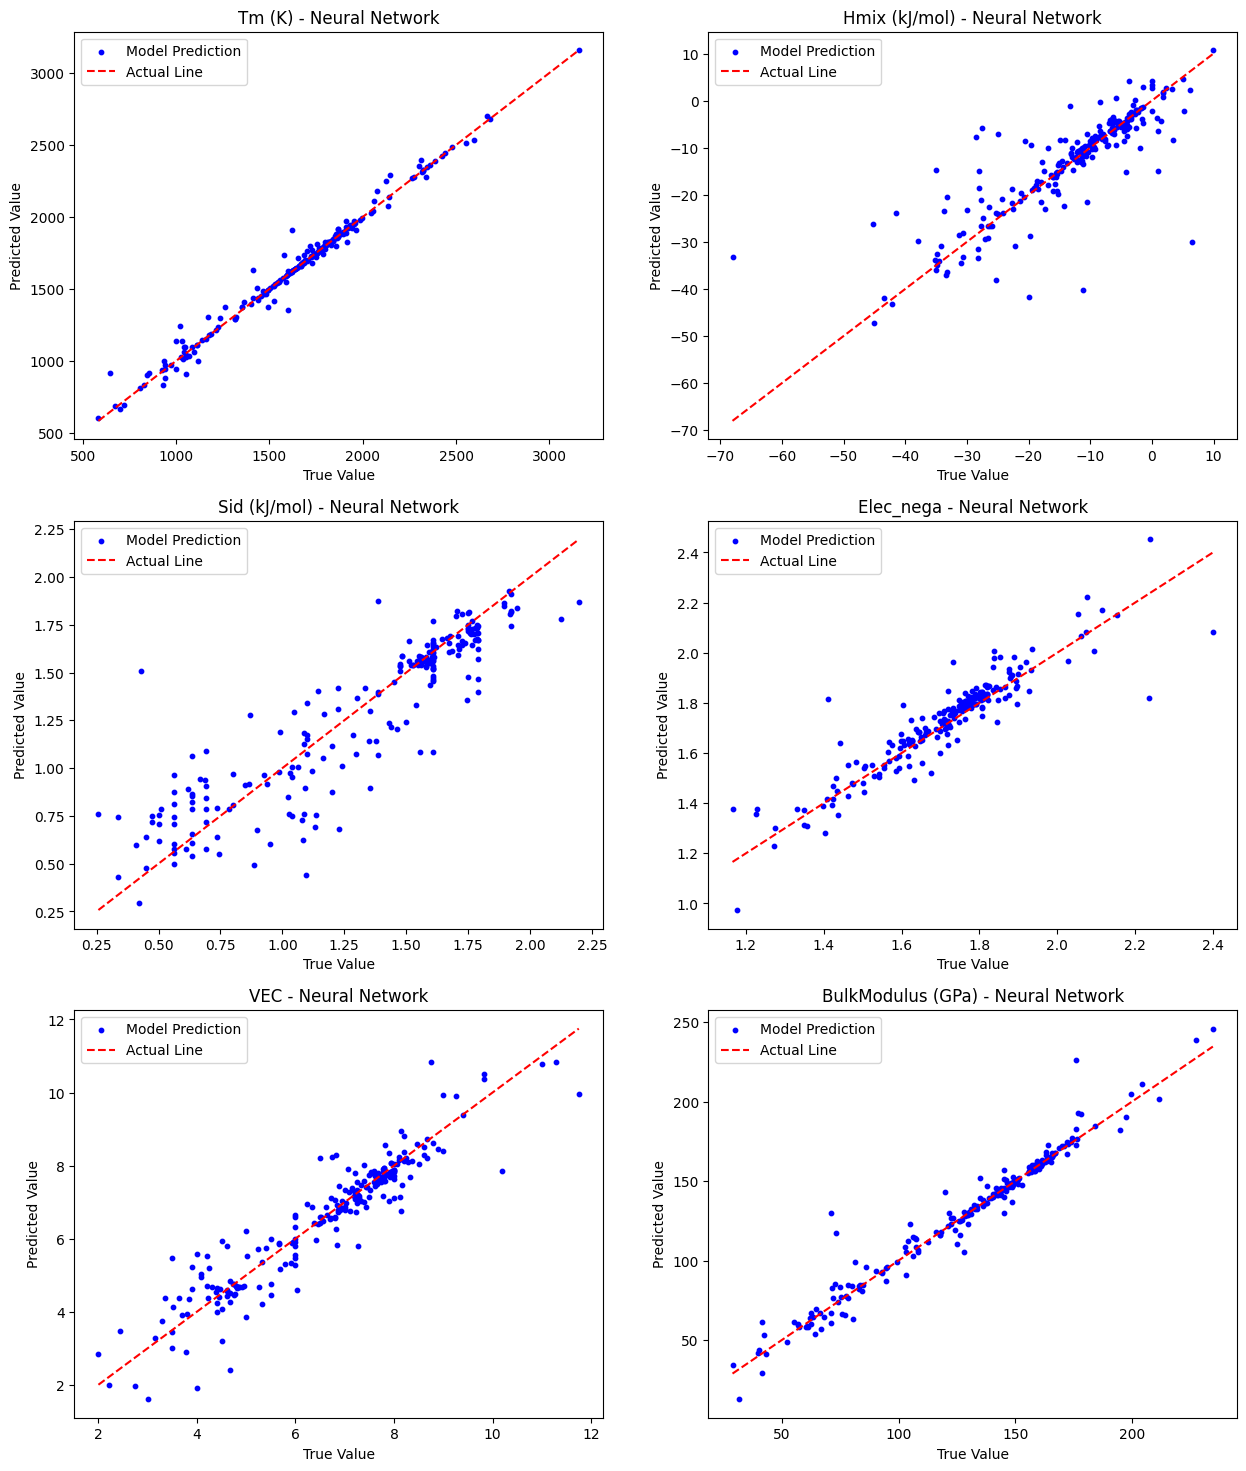

In [ ]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_nn], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - Neural Network')
  plt.legend()

plt.show()

## KNN

In [ ]:
kn_model = KNeighborsRegressor(leaf_size=1, metric='minkowski', algorithm='auto', n_neighbors=3, p=1, weights='uniform')
kn_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = kn_model.score(X_train, Y_train)
test_accuracy = kn_model.score(X_test, Y_test)

print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_kn = kn_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_kn)
test_mae = mean_absolute_error(Y_test, Y_pred_kn)
print("KNN MSE: %.2f" %(test_mse))
print("KNN MAE: %.2f" %(test_mae))
print("KNN RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.93
Test accuracy: 0.83
KNN MSE: 2851.90
KNN MAE: 14.40
KNN RMSE: 53.40


### Plot of Test and Train accuracies with No. of nearest neighbours

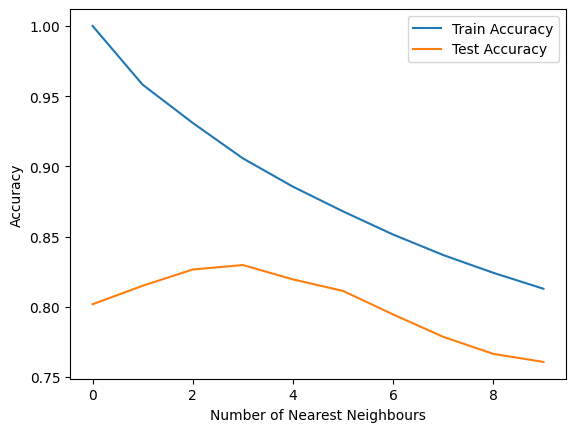

In [ ]:
trainacc = np.zeros(10)
testacc = np.zeros(10)
for i in range(10):
  kn_model = KNeighborsRegressor(leaf_size=1, metric='minkowski', algorithm='auto', n_neighbors=i+1, p=1, weights='uniform')
  kn_model.fit(X_train, Y_train)
  trainacc[i] = train_accuracy = kn_model.score(X_train, Y_train)
  testacc[i] = test_accuracy = kn_model.score(X_test, Y_test)
plt.plot(trainacc, label = 'Train Accuracy')
plt.plot(testacc, label = 'Test Accuracy')
plt.xlabel('Number of Nearest Neighbours')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
for i in range(len(y_col)):
  print(f"For %s, MAE = %.2f, MSE = %.2f" %(y_col[i], mean_absolute_error(Y_test[y_col[i]], [a[i] for a in Y_pred_kn]), mean_squared_error(Y_test[y_col[i]], [a[i] for a in Y_pred_kn])))

For Tm (K), MAE = 74.05, MSE = 16854.98
For Hmix (kJ/mol), MAE = 3.97, MSE = 65.62
For Sid (kJ/mol), MAE = 0.07, MSE = 0.01
For Elec_nega, MAE = 0.04, MSE = 0.00
For VEC, MAE = 0.40, MSE = 0.49
For BulkModulus (GPa), MAE = 7.89, MSE = 190.30


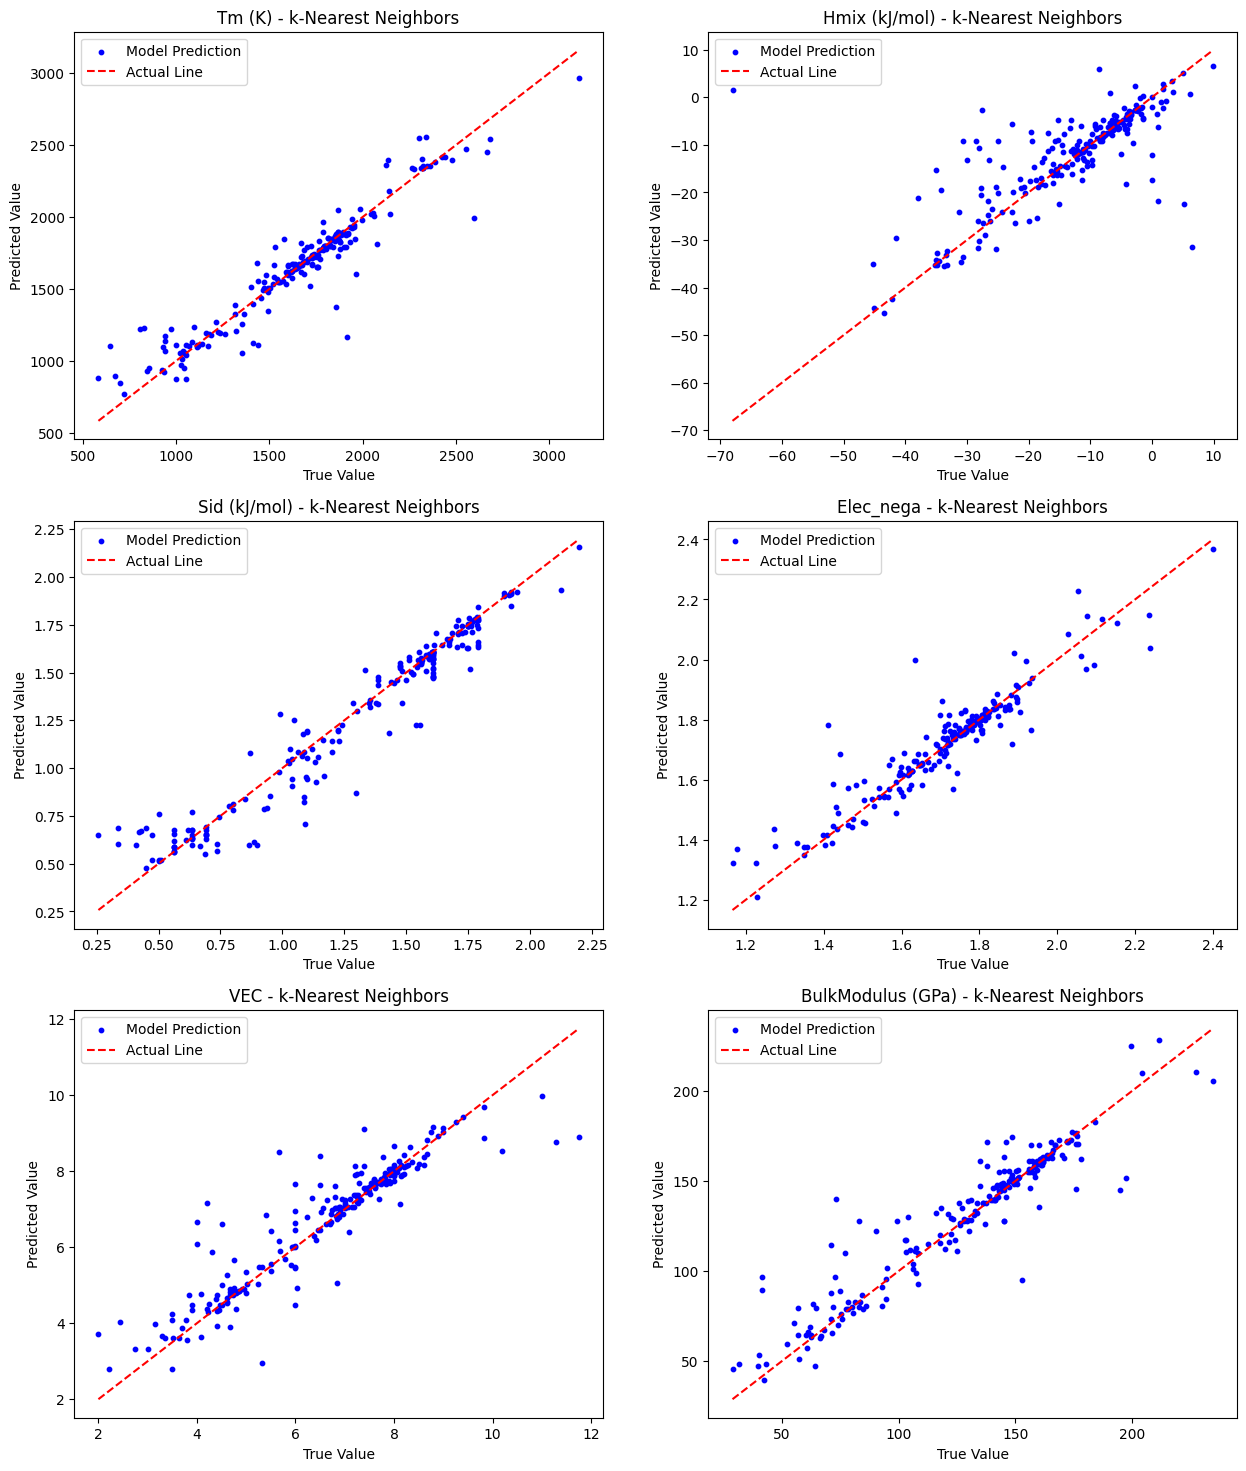

In [ ]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_kn], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - k-Nearest Neighbors')
  plt.legend()

plt.show()

## Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = lr_model.score(X_train, Y_train)
test_accuracy = lr_model.score(X_test, Y_test)

print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_lr = lr_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_lr)
test_mae = mean_absolute_error(Y_test, Y_pred_lr)
print("LR MSE: %.2f" %(test_mse))
print("LR MAE: %.2f" %(test_mae))
print("LR RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.68
Test accuracy: -7136106246379727.00
LR MSE: 421150117877177909248.00
LR MAE: 593536944.07
LR RMSE: 20521942351.47


In [ ]:
for i in range(len(y_col)):
  print(f"For %s, MAE = %.2f, MSE = %.2f" %(y_col[i], mean_absolute_error(Y_test[y_col[i]], [a[i] for a in Y_pred_lr]), mean_squared_error(Y_test[y_col[i]], [a[i] for a in Y_pred_lr])))

For Tm (K), MAE = 3379066242.72, MSE = 2523397242259183763456.00
For Hmix (kJ/mol), MAE = 63695226.74, MSE = 896614883358978944.00
For Sid (kJ/mol), MAE = 4089275.74, MSE = 3695600701831646.00
For Elec_nega, MAE = 84526.15, MSE = 1578969324784.09
For VEC, MAE = 5916808.59, MSE = 7736903375310089.00
For BulkModulus (GPa), MAE = 108369584.46, MSE = 2595416037478574080.00


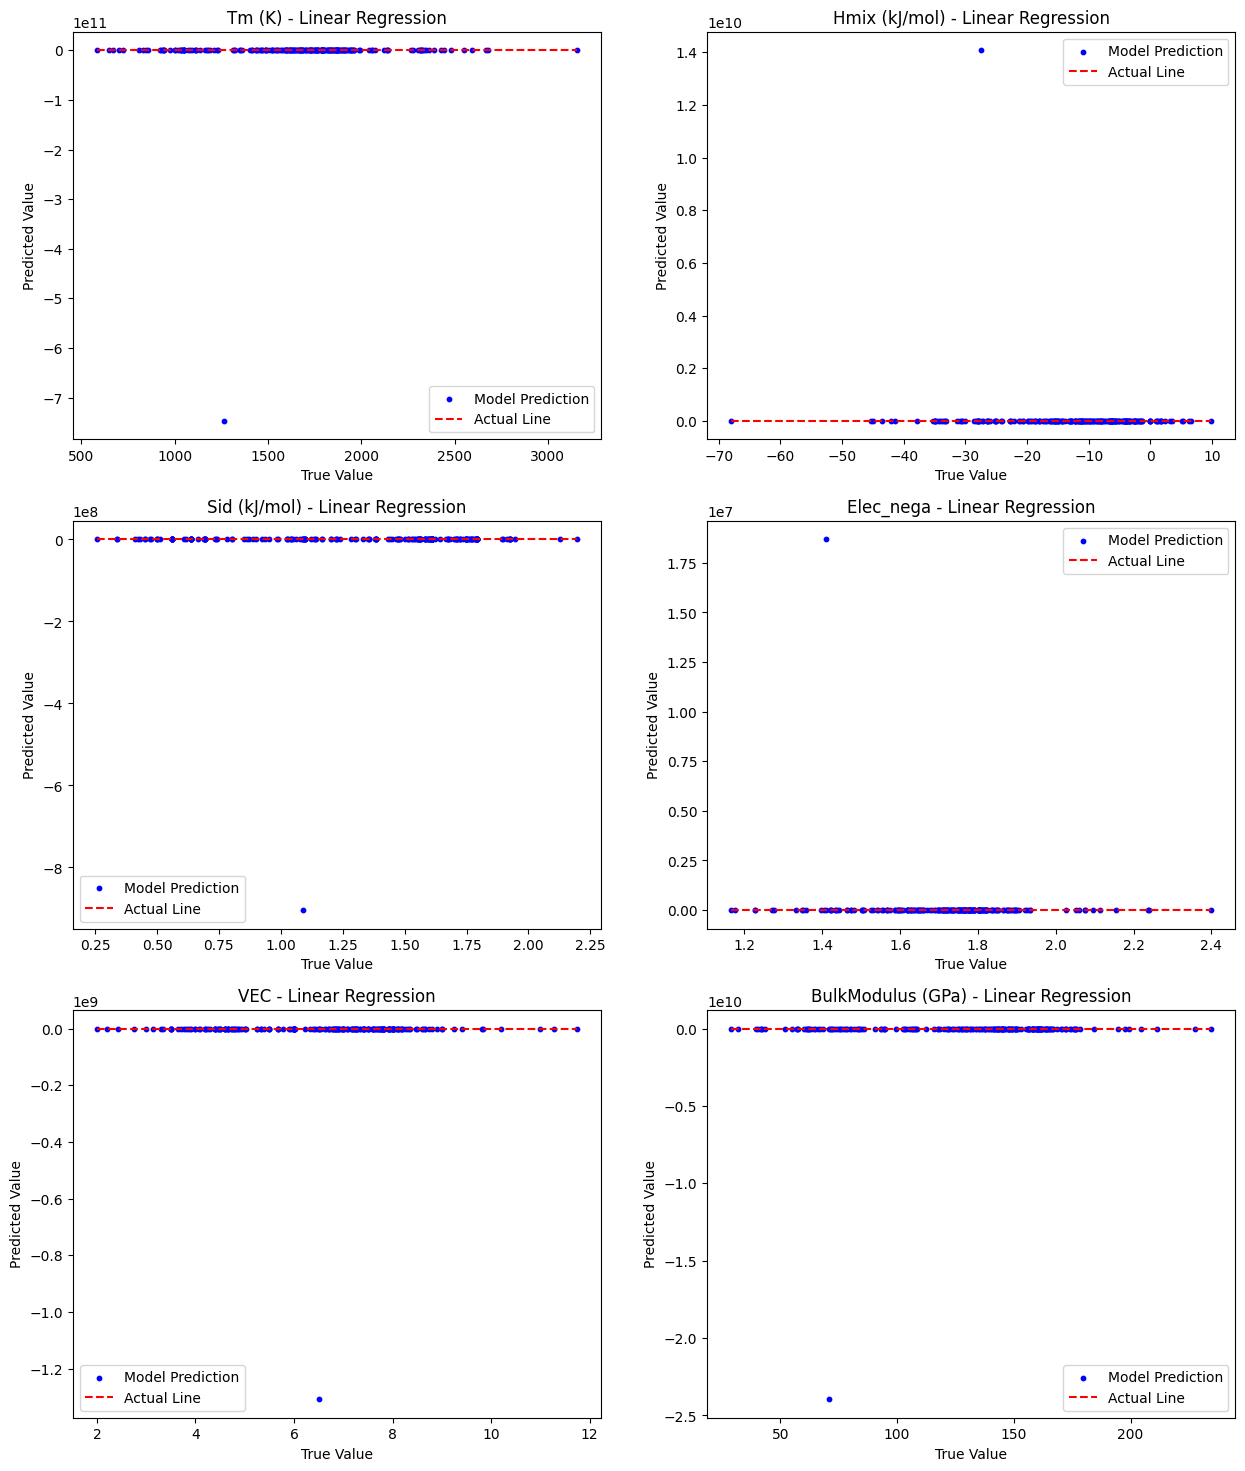

In [ ]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_lr], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - Linear Regression')
  plt.legend()

plt.show()

### Using Ridge Regression for Regularization because weights obtained by Linear Regression were too large

In [102]:
clf = RidgeCV(alphas=[0.01]).fit(X_train, Y_train)

# Evaluate the model
train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)

print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_lr = clf.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_lr)
test_mae = mean_absolute_error(Y_test, Y_pred_lr)
print("LR MSE: %.2f" %(test_mse))
print("LR MAE: %.2f" %(test_mae))
print("LR RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.68
Test accuracy: 0.26
LR MSE: 26708.46
LR MAE: 43.21
LR RMSE: 163.43


In [ ]:
for i in range(len(y_col)):
  print(f"For %s, MAE = %.2f, MSE = %.2f" %(y_col[i], mean_absolute_error(Y_test[y_col[i]], [a[i] for a in Y_pred_lr]), mean_squared_error(Y_test[y_col[i]], [a[i] for a in Y_pred_lr])))

For Tm (K), MAE = 237.06, MSE = 159516.08
For Hmix (kJ/mol), MAE = 7.84, MSE = 167.02
For Sid (kJ/mol), MAE = 0.11, MSE = 0.03
For Elec_nega, MAE = 0.07, MSE = 0.04
For VEC, MAE = 0.96, MSE = 2.15
For BulkModulus (GPa), MAE = 13.23, MSE = 565.47


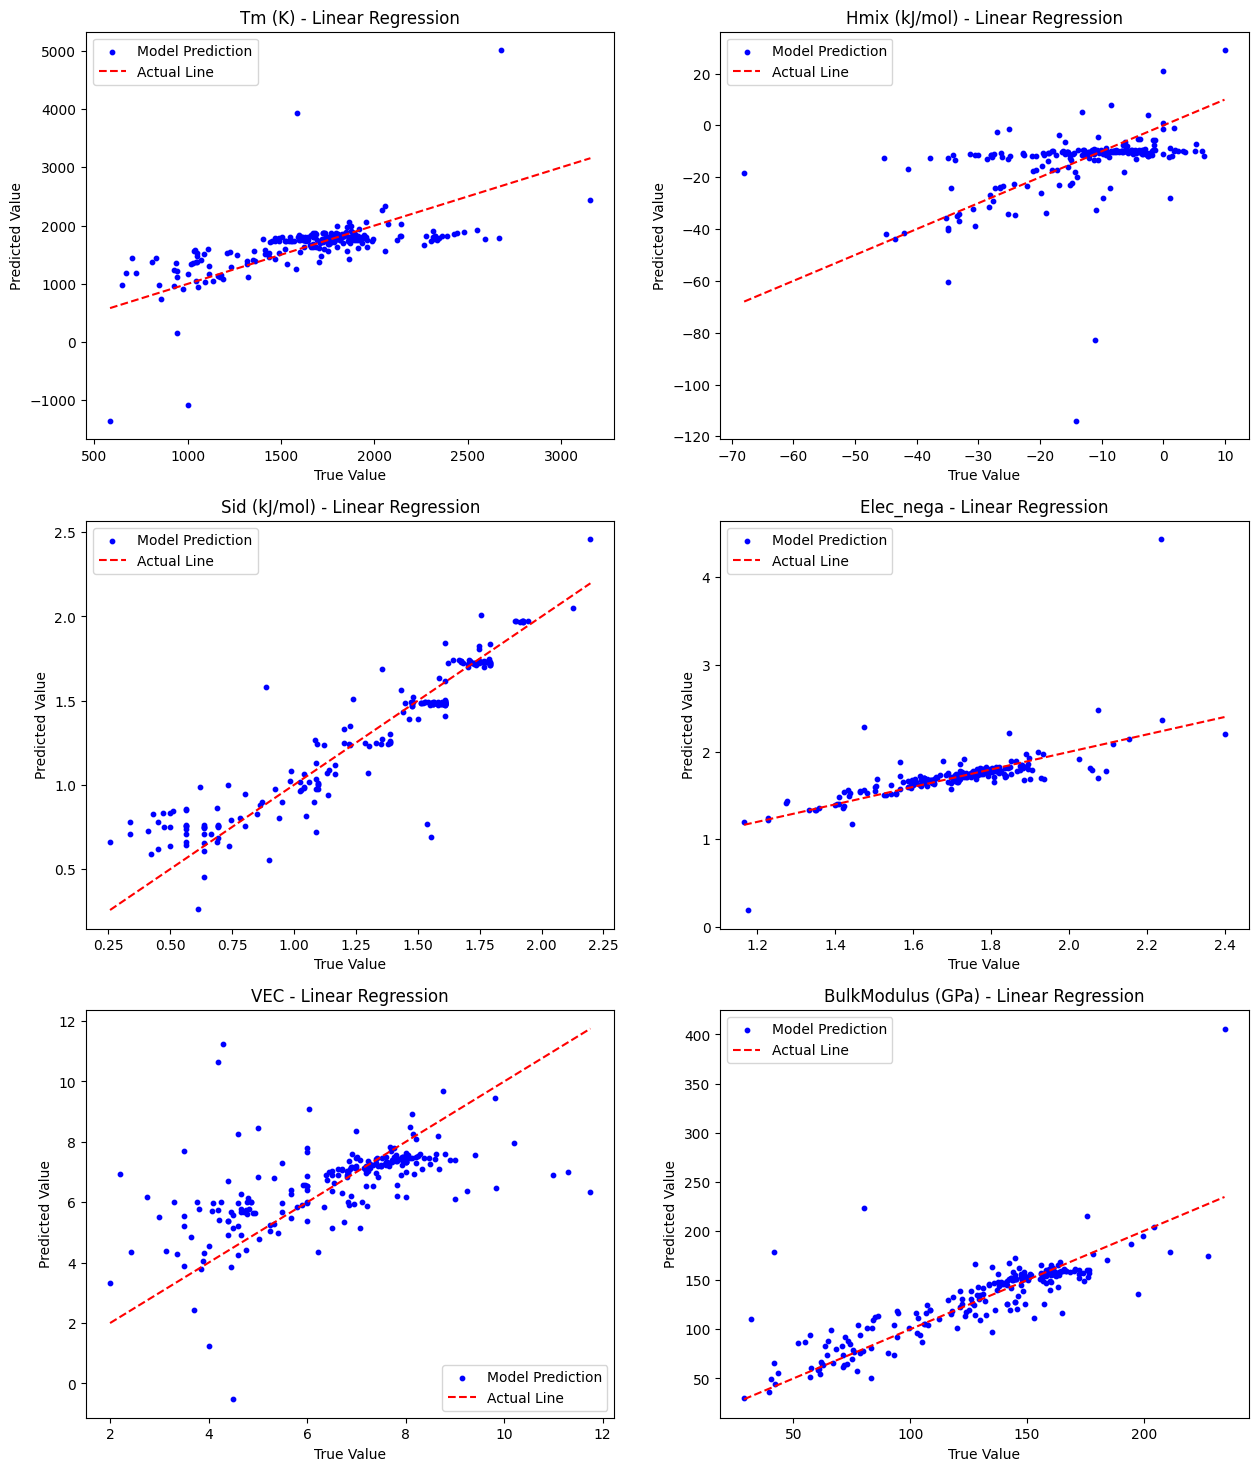

In [ ]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_lr], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - Linear Regression')
  plt.legend()

plt.show()

## Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=500, criterion='squared_error', max_depth=150, min_samples_split=4,
                                  min_samples_leaf=2, max_features='sqrt', bootstrap=True, oob_score=True, n_jobs=-1,
                                  random_state=42, verbose=0, max_samples=None)
rf_model.fit(X_train, Y_train)

# Evaluate the model
print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_rf = rf_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_rf)
test_mae = mean_absolute_error(Y_test, Y_pred_rf)
print("RF MSE: %.2f" %(test_mse))
print("RF MAE: %.2f" %(test_mae))
print("RF RMSE: %.2f" %(np.sqrt(test_mse)))


Training accuracy: 0.68
Test accuracy: -7136106246379727.00
RF MSE: 4394.20
RF MAE: 19.91
RF RMSE: 66.29


In [ ]:
for i in range(len(y_col)):
  print(f"For %s, MAE = %.2f, MSE = %.2f" %(y_col[i], mean_absolute_error(Y_test[y_col[i]], [a[i] for a in Y_pred_rf]), mean_squared_error(Y_test[y_col[i]], [a[i] for a in Y_pred_rf])))

For Tm (K), MAE = 102.49, MSE = 26079.06
For Hmix (kJ/mol), MAE = 5.66, MSE = 64.54
For Sid (kJ/mol), MAE = 0.13, MSE = 0.03
For Elec_nega, MAE = 0.06, MSE = 0.01
For VEC, MAE = 0.70, MSE = 1.13
For BulkModulus (GPa), MAE = 10.42, MSE = 220.44


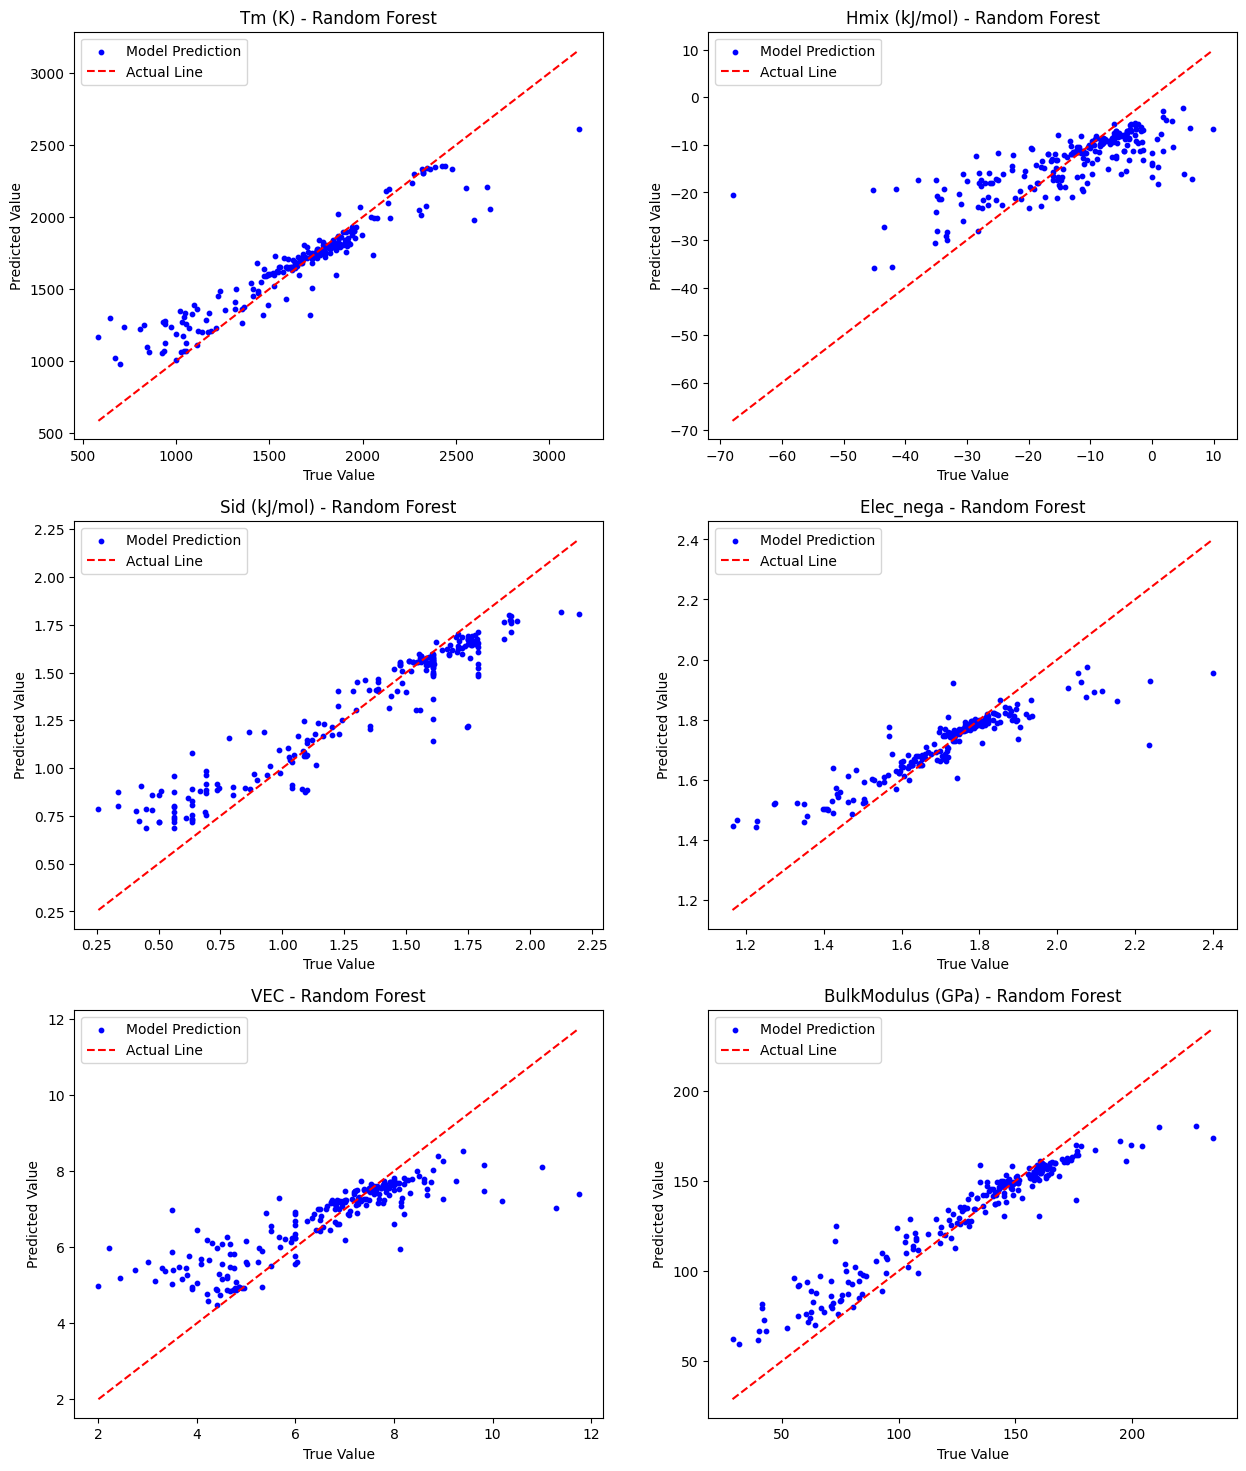

In [ ]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_rf], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - Random Forest')
  plt.legend()

plt.show()

## Extreme Gradient Boosting

In [ ]:
xgb_model = XGBRegressor(objective ='reg:squarederror',n_estimators=200, reg_lambda=1, gamma=0,max_depth=3, learning_rate=0.1, reg_alpha=0.1, seed = 123)
xgb_model.fit(X_train, Y_train)

# Evaluate the model
print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_xgb = xgb_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_xgb)
test_mae = mean_absolute_error(Y_test, Y_pred_xgb)
print("RF MSE: %.2f" %(test_mse))
print("RF MAE: %.2f" %(test_mae))
print("RF RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.68
Test accuracy: -7136106246379727.00
RF MSE: 3026.97
RF MAE: 15.35
RF RMSE: 55.02


In [ ]:
for i in range(len(y_col)):
  print(f"For %s, MAE = %.2f, MSE = %.2f" %(y_col[i], mean_absolute_error(Y_test[y_col[i]], [a[i] for a in Y_pred_xgb]), mean_squared_error(Y_test[y_col[i]], [a[i] for a in Y_pred_xgb])))

For Tm (K), MAE = 81.16, MSE = 18001.68
For Hmix (kJ/mol), MAE = 4.76, MSE = 76.44
For Sid (kJ/mol), MAE = 0.06, MSE = 0.01
For Elec_nega, MAE = 0.03, MSE = 0.00
For VEC, MAE = 0.41, MSE = 0.37
For BulkModulus (GPa), MAE = 5.69, MSE = 83.30


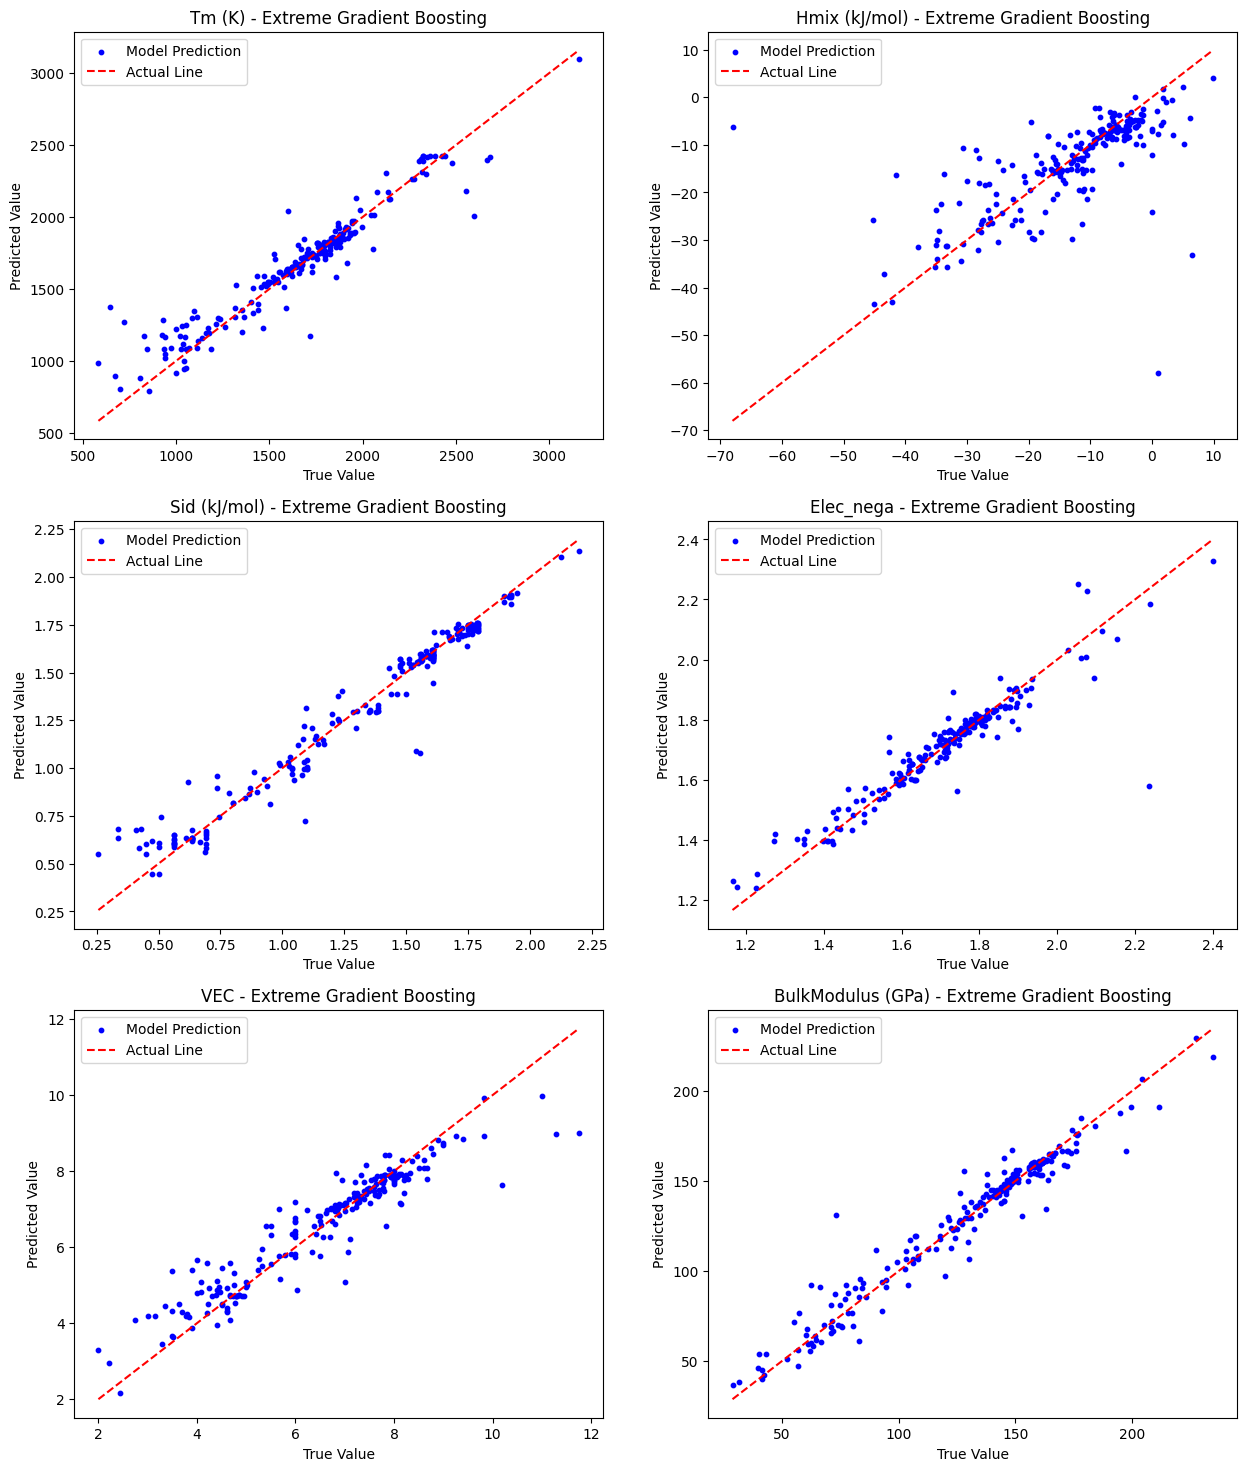

In [ ]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_xgb], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - Extreme Gradient Boosting')
  plt.legend()

plt.show()

# Classification Model
## Prediction of Phase from Atomic Composition

In [89]:
y_col = ['IMsp', 'IMp', 'AMsp', 'AMp', 'SSsp', 'FCCp', 'B2p', 'BCCp', 'HCPp', '2BCCp', 'SSp', 'L12p', '2FCCp']
# Split data into features (X) and target (Y)
# X = data.drop(columns=y_col)
X = data.loc[:, 'Ag':'Zr'].join(data.loc[:, ['No', 'a (Å)']])
Y = data[y_col]
print(len(y_col))
Y

13


IMsp  IMp  AMsp  AMp  SSsp  FCCp  B2p  BCCp  HCPp  2BCCp  SSp  L12p  \
0      1.0  1.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   
1      1.0  1.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   
2      1.0  1.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   
3      1.0  1.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   
4      1.0  1.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   
...    ...  ...   ...  ...   ...   ...  ...   ...   ...    ...  ...   ...   
1098   0.0  0.0   0.0  0.0   1.0   0.0  0.0   0.0   0.0    0.0  1.0   0.0   
1099   1.0  1.0   0.0  0.0   1.0   0.0  0.0   0.0   0.0    0.0  1.0   0.0   
1100   0.0  0.0   0.0  0.0   1.0   0.0  0.0   0.0   0.0    0.0  1.0   0.0   
1101   1.0  1.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   
1102   1.0  1.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   

      2FCCp  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
1098    0.0  
1099    0.0  
1100    0.0  
1101    0.0  
1102    0.0  

[1103 rows x 13 columns]

In [90]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
Y_test.shape

0
0


(221, 13)

## Random Forest

Test Accuracy: 71.49%
Confusion matrix for class IMsp:


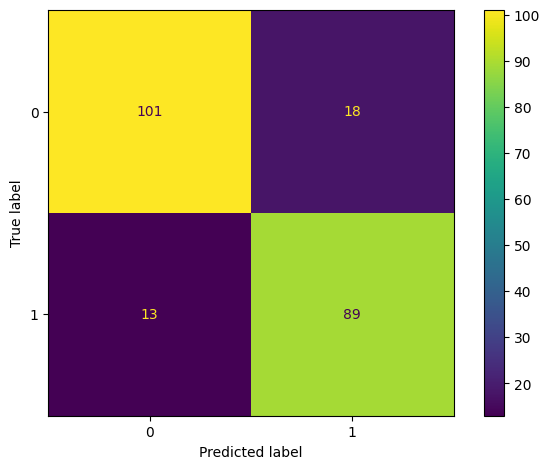

Confusion matrix for class IMp:


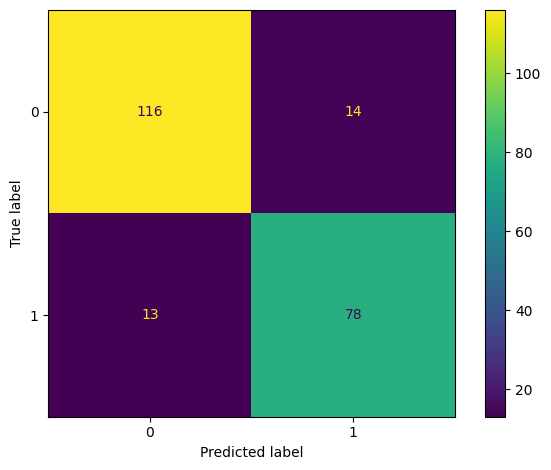

Confusion matrix for class AMsp:


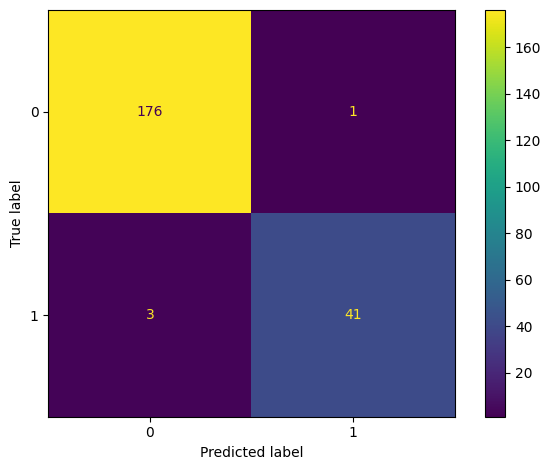

Confusion matrix for class AMp:


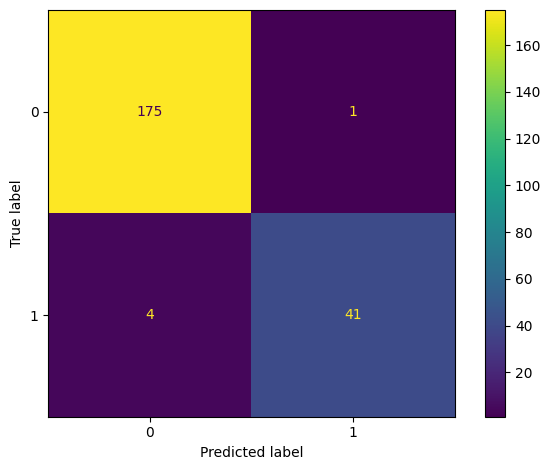

Confusion matrix for class SSsp:


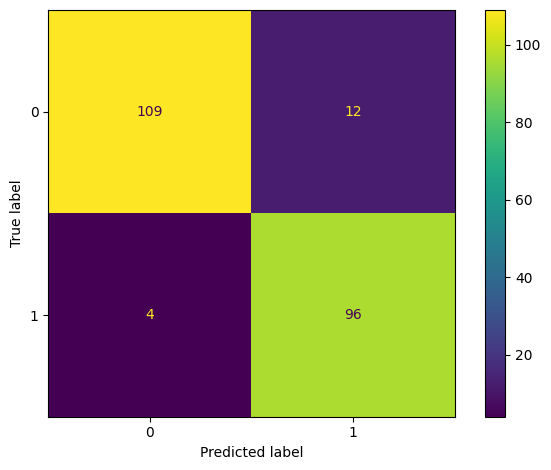

Confusion matrix for class FCCp:


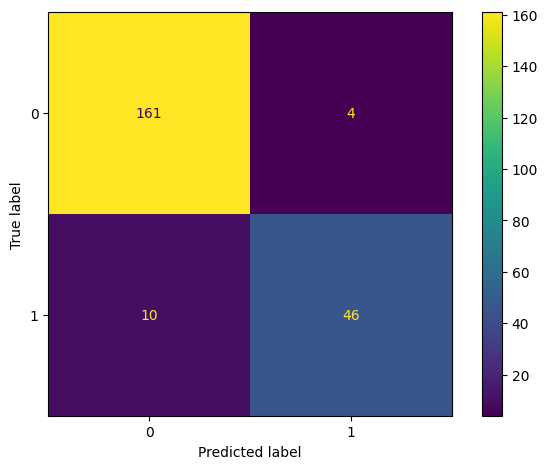

Confusion matrix for class B2p:


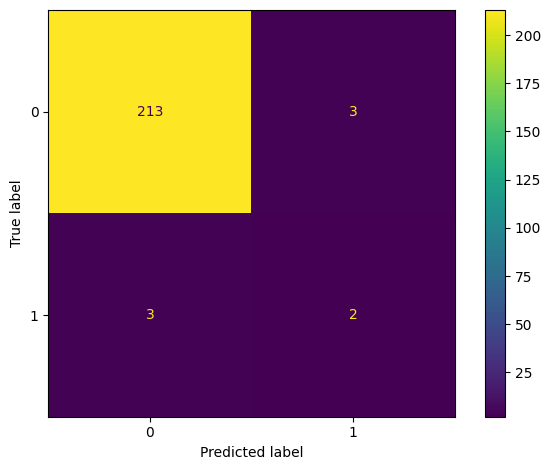

Confusion matrix for class BCCp:


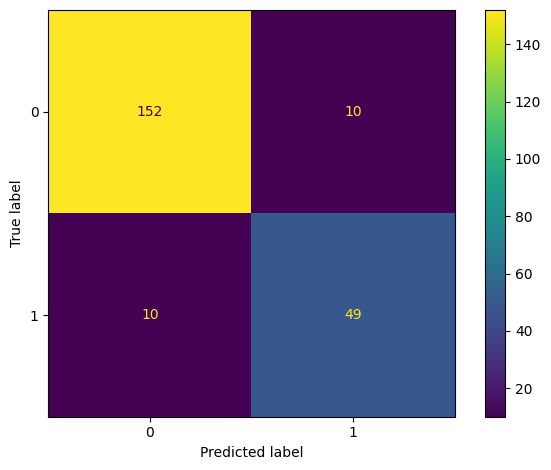

Confusion matrix for class HCPp:


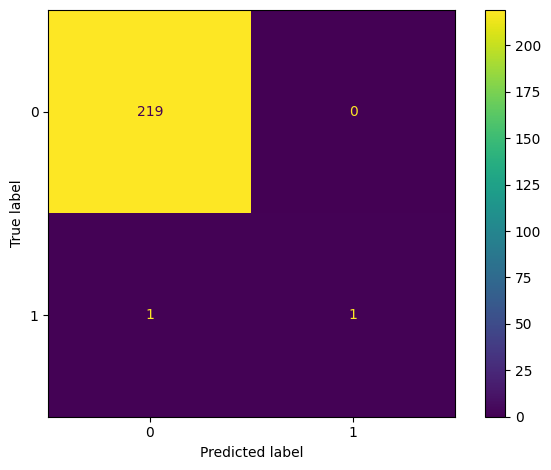

Confusion matrix for class 2BCCp:


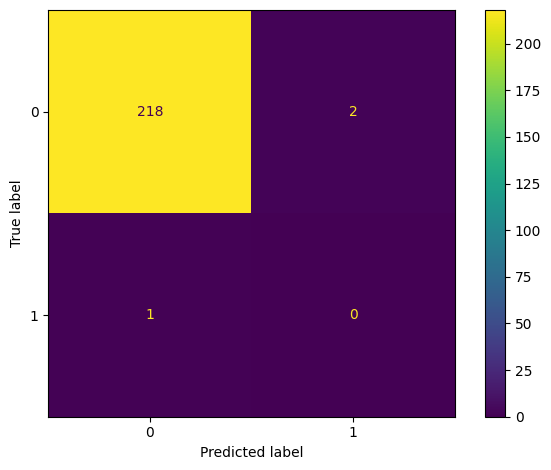

Confusion matrix for class SSp:


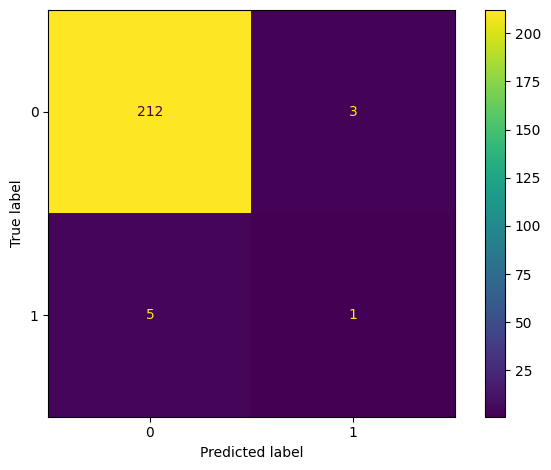

Confusion matrix for class L12p:


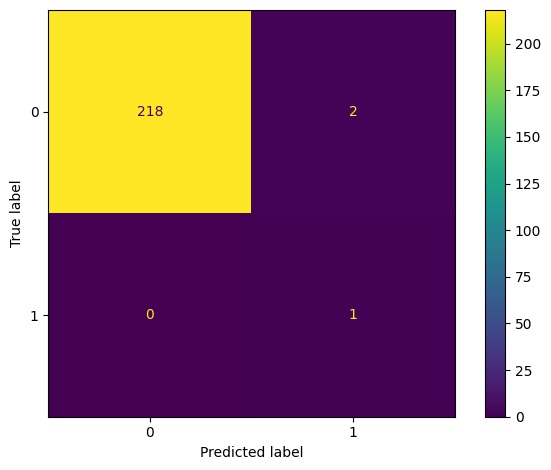

Confusion matrix for class 2FCCp:


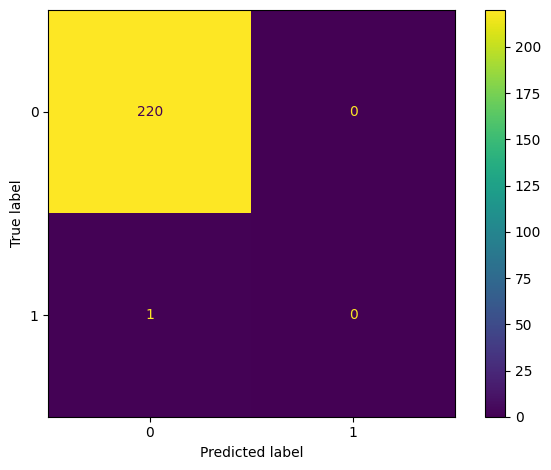

              precision    recall  f1-score   support

        IMsp       0.83      0.87      0.85       102
         IMp       0.85      0.86      0.85        91
        AMsp       0.98      0.93      0.95        44
         AMp       0.98      0.91      0.94        45
        SSsp       0.89      0.96      0.92       100
        FCCp       0.92      0.82      0.87        56
         B2p       0.40      0.40      0.40         5
        BCCp       0.83      0.83      0.83        59
        HCPp       1.00      0.50      0.67         2
       2BCCp       0.00      0.00      0.00         1
         SSp       0.25      0.17      0.20         6
        L12p       0.33      1.00      0.50         1
       2FCCp       0.00      0.00      0.00         1

   micro avg       0.86      0.87      0.87       513
   macro avg       0.63      0.63      0.61       513
weighted avg       0.87      0.87      0.87       513
 samples avg       0.88      0.88      0.87       513



In [ ]:
rf_model = RandomForestClassifier(n_estimators=55, criterion='entropy', max_depth=100, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True, oob_score=True, n_jobs=-1,
                                  random_state=42, verbose=0, max_samples=None)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(Y_test, y_pred_rf)

print("Test Accuracy: %.2f%%" % (accuracy_rf * 100.0))

mcm = multilabel_confusion_matrix(Y_test, y_pred_rf)

for i, cm in enumerate(mcm):
    print(f"Confusion matrix for class {y_col[i]}:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.tight_layout()
    plt.show()

print(classification_report(Y_test, y_pred_rf, target_names=y_col))

## Neural Network

Test Accuracy: 66.97%
Confusion matrix for class IMsp:


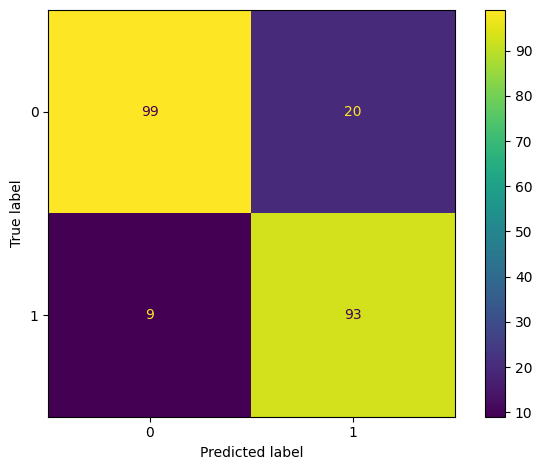

Confusion matrix for class IMp:


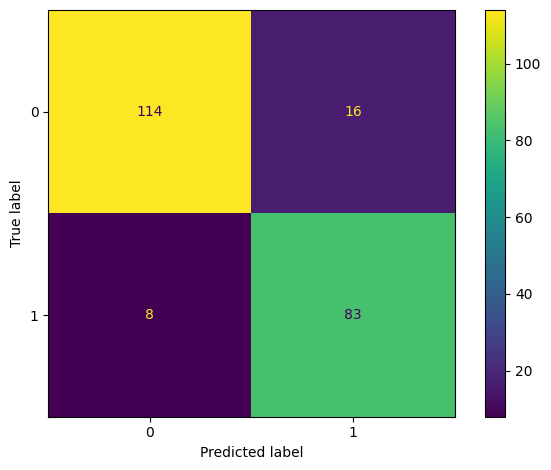

Confusion matrix for class AMsp:


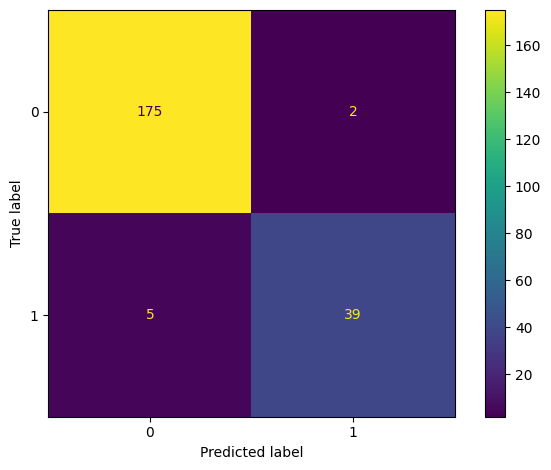

Confusion matrix for class AMp:


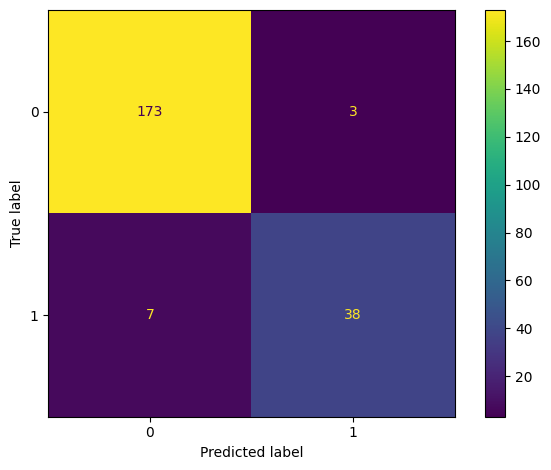

Confusion matrix for class SSsp:


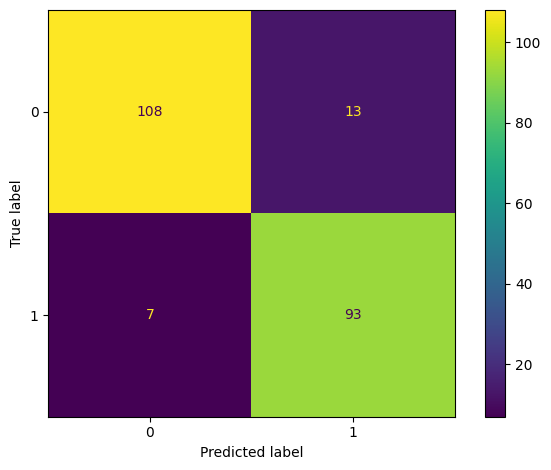

Confusion matrix for class FCCp:


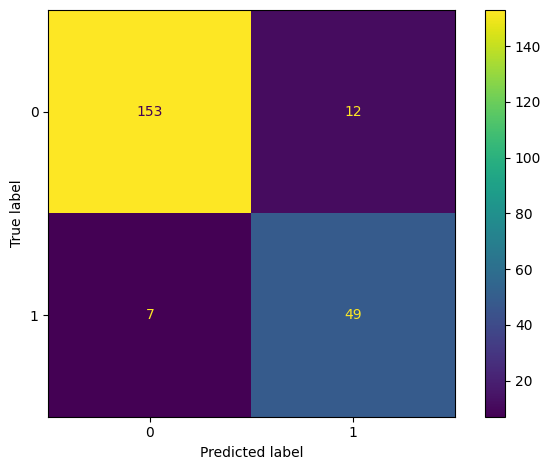

Confusion matrix for class B2p:


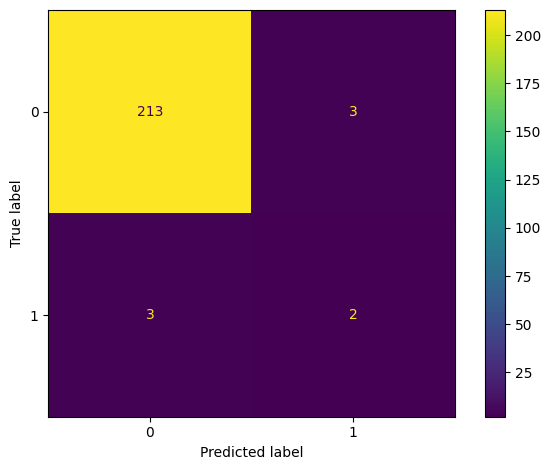

Confusion matrix for class BCCp:


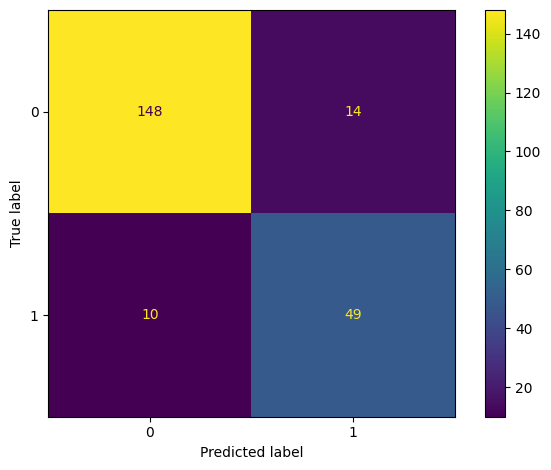

Confusion matrix for class HCPp:


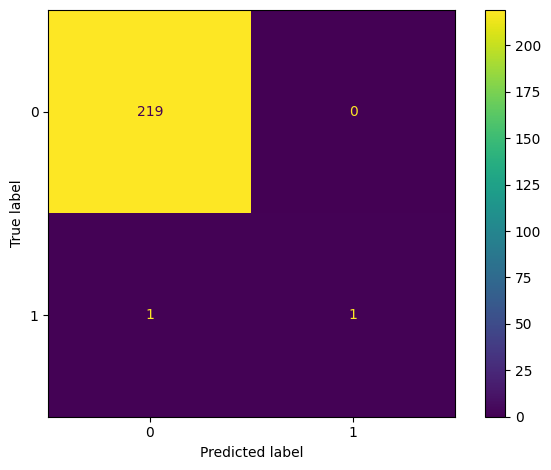

Confusion matrix for class 2BCCp:


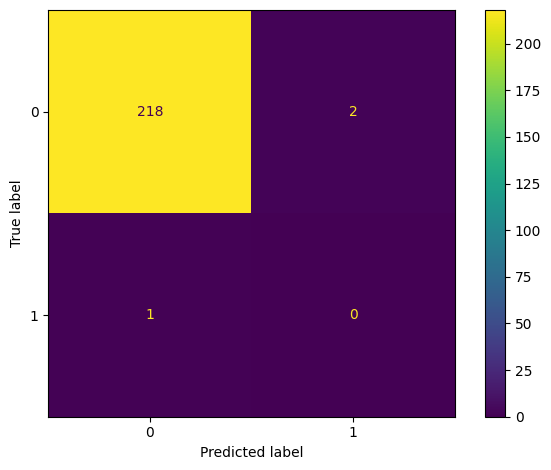

Confusion matrix for class SSp:


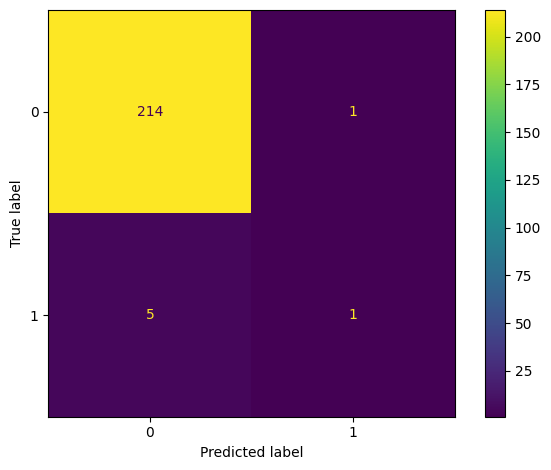

Confusion matrix for class L12p:


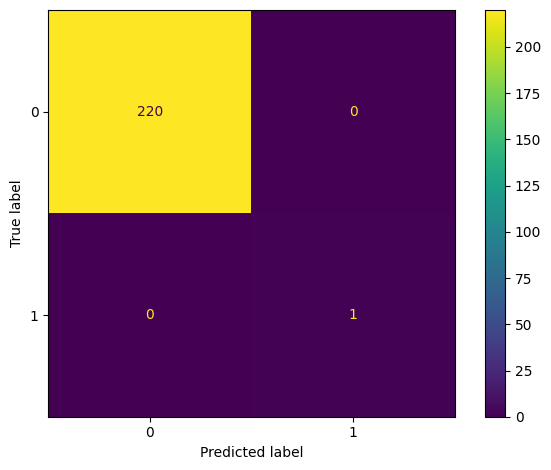

Confusion matrix for class 2FCCp:


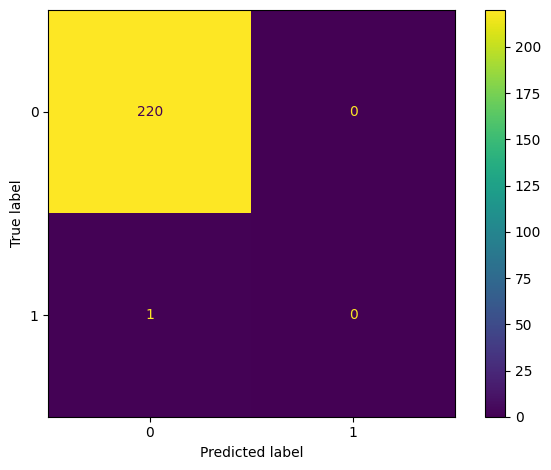

              precision    recall  f1-score   support

        IMsp       0.82      0.91      0.87       102
         IMp       0.84      0.91      0.87        91
        AMsp       0.95      0.89      0.92        44
         AMp       0.93      0.84      0.88        45
        SSsp       0.88      0.93      0.90       100
        FCCp       0.80      0.88      0.84        56
         B2p       0.40      0.40      0.40         5
        BCCp       0.78      0.83      0.80        59
        HCPp       1.00      0.50      0.67         2
       2BCCp       0.00      0.00      0.00         1
         SSp       0.50      0.17      0.25         6
        L12p       1.00      1.00      1.00         1
       2FCCp       0.00      0.00      0.00         1

   micro avg       0.84      0.88      0.86       513
   macro avg       0.68      0.64      0.65       513
weighted avg       0.84      0.88      0.85       513
 samples avg       0.86      0.89      0.86       513



In [91]:
nn_model = MLPClassifier(activation='logistic', alpha=0.0001, batch_size = 2, max_iter=8000, random_state=42)
nn_model.fit(X_train, Y_train)
y_pred_nn = nn_model.predict(X_test)
accuracy_nn = accuracy_score(Y_test, y_pred_nn)

print("Test Accuracy: %.2f%%" % (accuracy_nn * 100.0))

mcm = multilabel_confusion_matrix(Y_test, y_pred_nn)

for i, cm in enumerate(mcm):
    print(f"Confusion matrix for class {y_col[i]}:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.tight_layout()
    plt.show()

print(classification_report(Y_test, y_pred_nn, target_names=y_col))

# Inclusion of Phase along with Atomic composition to predict Meling Temp., Hmix, etc.

In [92]:
y_col = ['Tm (K)', 'Hmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'VEC', 'BulkModulus (GPa)']
# Split data into features (X) and target (Y)
X = data.loc[:, 'Ag':].join(data.loc[:, ['No', 'a (Å)']])
Y = data[y_col]
X

Ag   Al  As  Au    B  Ba   Be  Bi  Br    C  ...  FCCp  B2p  BCCp  HCPp  \
0     2.0  1.0   0   0  0.0   0  0.0   0   0  0.0  ...   0.0  0.0   0.0   0.0   
1     5.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0.0  0.0   0.0   0.0   
2     2.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0.0  0.0   0.0   0.0   
3     3.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0.0  0.0   0.0   0.0   
4     1.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0.0  0.0   0.0   0.0   
...   ...  ...  ..  ..  ...  ..  ...  ..  ..  ...  ...   ...  ...   ...   ...   
1098  0.0  2.0   0   0  0.0   0  0.0   0   0  0.0  ...   0.0  0.0   0.0   0.0   
1099  0.0  6.0   0   0  0.0   0  0.0   0   0  0.0  ...   0.0  0.0   0.0   0.0   
1100  0.0  1.0   0   0  0.0   0  0.0   0   0  0.0  ...   0.0  0.0   0.0   0.0   
1101  0.0  1.0   0   0  0.5   0  0.0   0   0  0.0  ...   0.0  0.0   0.0   0.0   
1102  0.0  0.4   0   0  0.0   0  0.0   0   0  0.0  ...   0.0  0.0   0.0   0.0   

      2BCCp  SSp  L12p  2FCCp  No     a (Å)  
0       0.0  0.0   0.0    0.0   2  1.544000  
1       0.0  0.0   0.0    0.0   2  1.580308  
2       0.0  0.0   0.0    0.0   2  1.475200  
3       0.0  0.0   0.0    0.0   2  1.548000  
4       0.0  0.0   0.0    0.0   2  1.600750  
...     ...  ...   ...    ...  ..       ...  
1098    0.0  1.0   0.0    0.0   9  1.325700  
1099    0.0  1.0   0.0    0.0   9  1.356071  
1100    0.0  1.0   0.0    0.0   9  1.313889  
1101    0.0  0.0   0.0    0.0  10  1.282842  
1102    0.0  0.0   0.0    0.0  10  1.367130  

[1103 rows x 93 columns]

In [93]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

Y_test.head()

Tm (K)  Hmix (kJ/mol)  Sid (kJ/mol)  Elec_nega       VEC  \
0  1830.466970      -6.519743      1.224095   1.770606  7.242424   
1  1731.154615     -11.597633      1.925121   1.773077  7.615385   
2  1052.783500      -6.270000      1.025094   1.423500  4.450000   
3  1636.294000     -26.400000      1.609438   1.754000  6.800000   
4  1784.894000     -37.920000      1.609438   1.668000  4.400000   

   BulkModulus (GPa)  
0         159.939394  
1         150.461538  
2          61.350000  
3         143.200000  
4         121.200000

In [94]:
Y_test.shape

(221, 6)

## Neural Network

In [95]:
# Initialize and train your neural network model
nn_model = MLPRegressor(activation='logistic', alpha=0.01, batch_size = 2, max_iter=8000, random_state=42)
nn_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = nn_model.score(X_train, Y_train)
test_accuracy = nn_model.score(X_test, Y_test)

print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_nn = nn_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_nn)
test_mae = mean_absolute_error(Y_test, Y_pred_nn)
print("NN MSE: %.2f" %(test_mse))
print("NN MAE: %.2f" %(test_mae))
print("NN RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.90
Test accuracy: 0.83
NN MSE: 562.21
NN MAE: 6.82
NN RMSE: 23.71


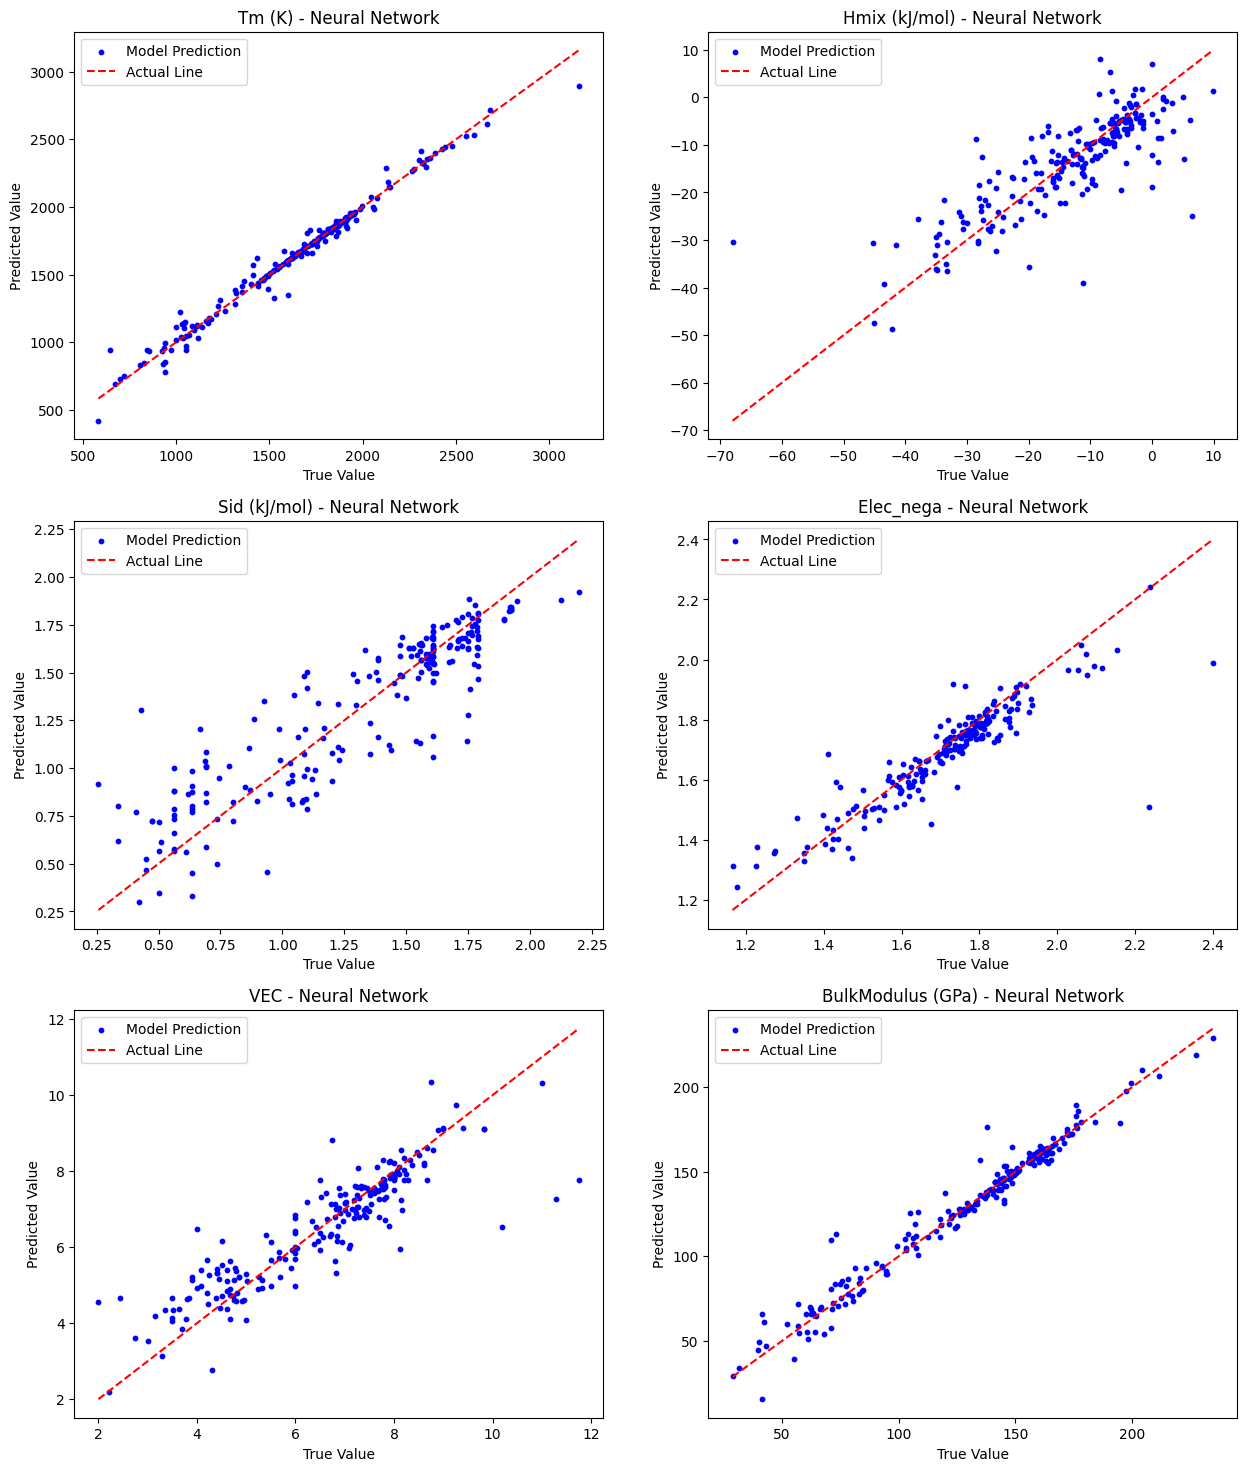

In [96]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_nn], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - Neural Network')
  plt.legend()

plt.show()

## k-Nearest Neighbors

In [97]:
kn_model = KNeighborsRegressor(leaf_size=1, metric='minkowski', algorithm='auto', n_neighbors=3, p=1, weights='uniform')
kn_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = kn_model.score(X_train, Y_train)
test_accuracy = kn_model.score(X_test, Y_test)

print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_kn = kn_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_kn)
test_mae = mean_absolute_error(Y_test, Y_pred_kn)
print("KNN MSE: %.2f" %(test_mse))
print("KNN MAE: %.2f" %(test_mae))
print("KNN RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.93
Test accuracy: 0.82
KNN MSE: 2917.09
KNN MAE: 15.15
KNN RMSE: 54.01


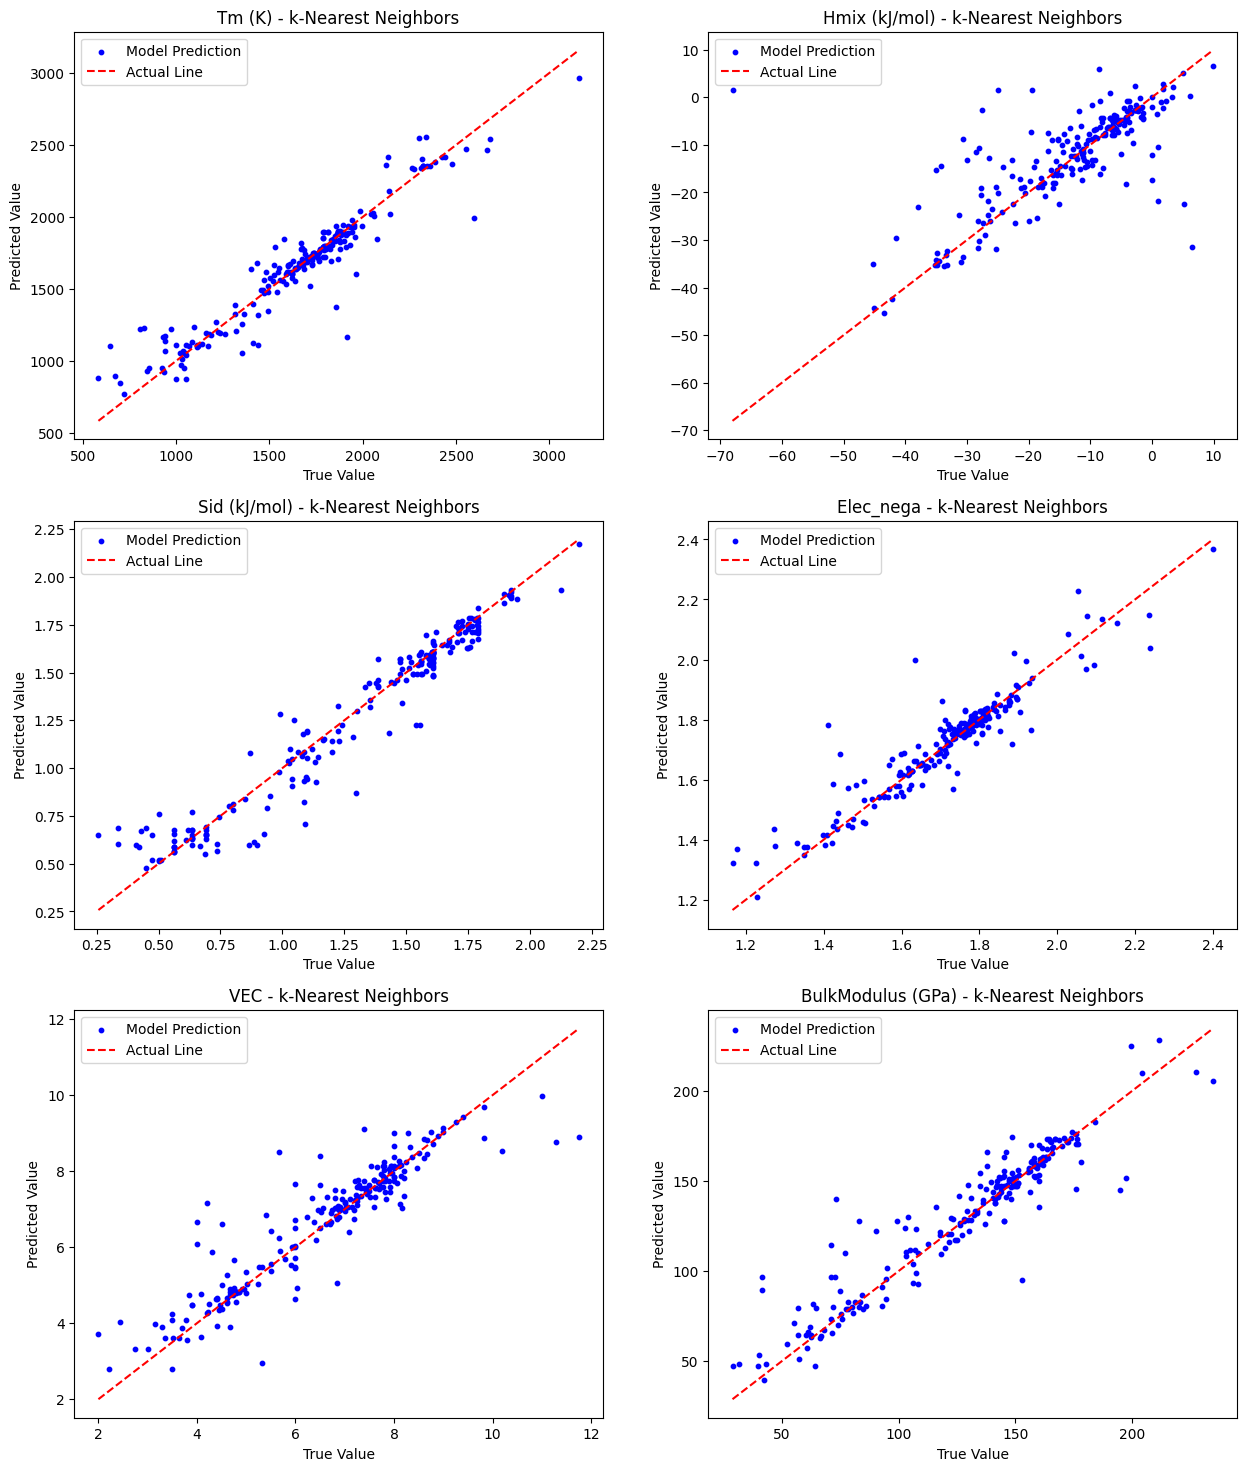

In [98]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_kn], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - k-Nearest Neighbors')
  plt.legend()

plt.show()

## Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = lr_model.score(X_train, Y_train)
test_accuracy = lr_model.score(X_test, Y_test)

print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_lr = lr_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_lr)
test_mae = mean_absolute_error(Y_test, Y_pred_lr)
print("LR MSE: %.2f" %(test_mse))
print("LR MAE: %.2f" %(test_mae))
print("LR RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.73
Test accuracy: 0.30
LR MSE: 18736.71
LR MAE: 39.01
LR RMSE: 136.88


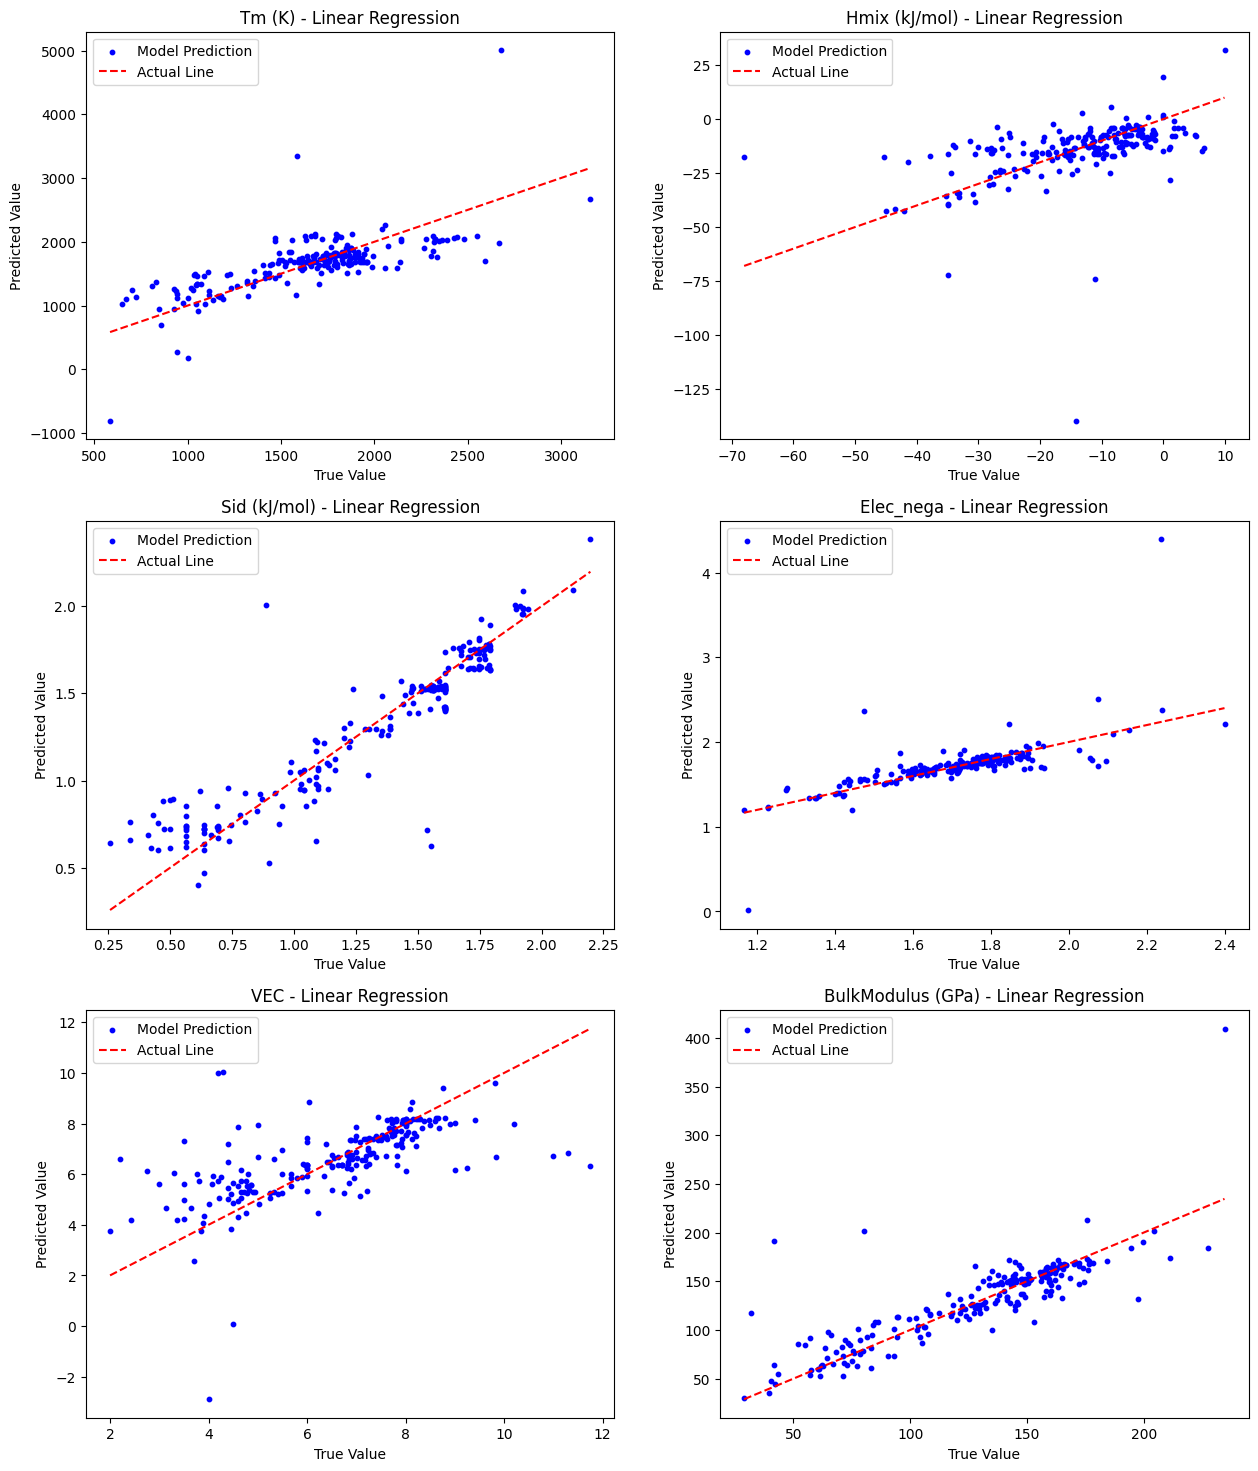

In [ ]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_lr], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - Linear Regression')
  plt.legend()

plt.show()

## Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=200, min_samples_split=2,
                                  min_samples_leaf=1, max_features='sqrt', bootstrap=True, oob_score=True, n_jobs=-1,
                                  random_state=42, verbose=0, max_samples=None)
rf_model.fit(X_train, Y_train)

# Evaluate the model
print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_rf = rf_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_rf)
test_mae = mean_absolute_error(Y_test, Y_pred_rf)
print("RF MSE: %.2f" %(test_mse))
print("RF MAE: %.2f" %(test_mae))
print("RF RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.73
Test accuracy: 0.30
RF MSE: 2190.68
RF MAE: 13.33
RF RMSE: 46.80


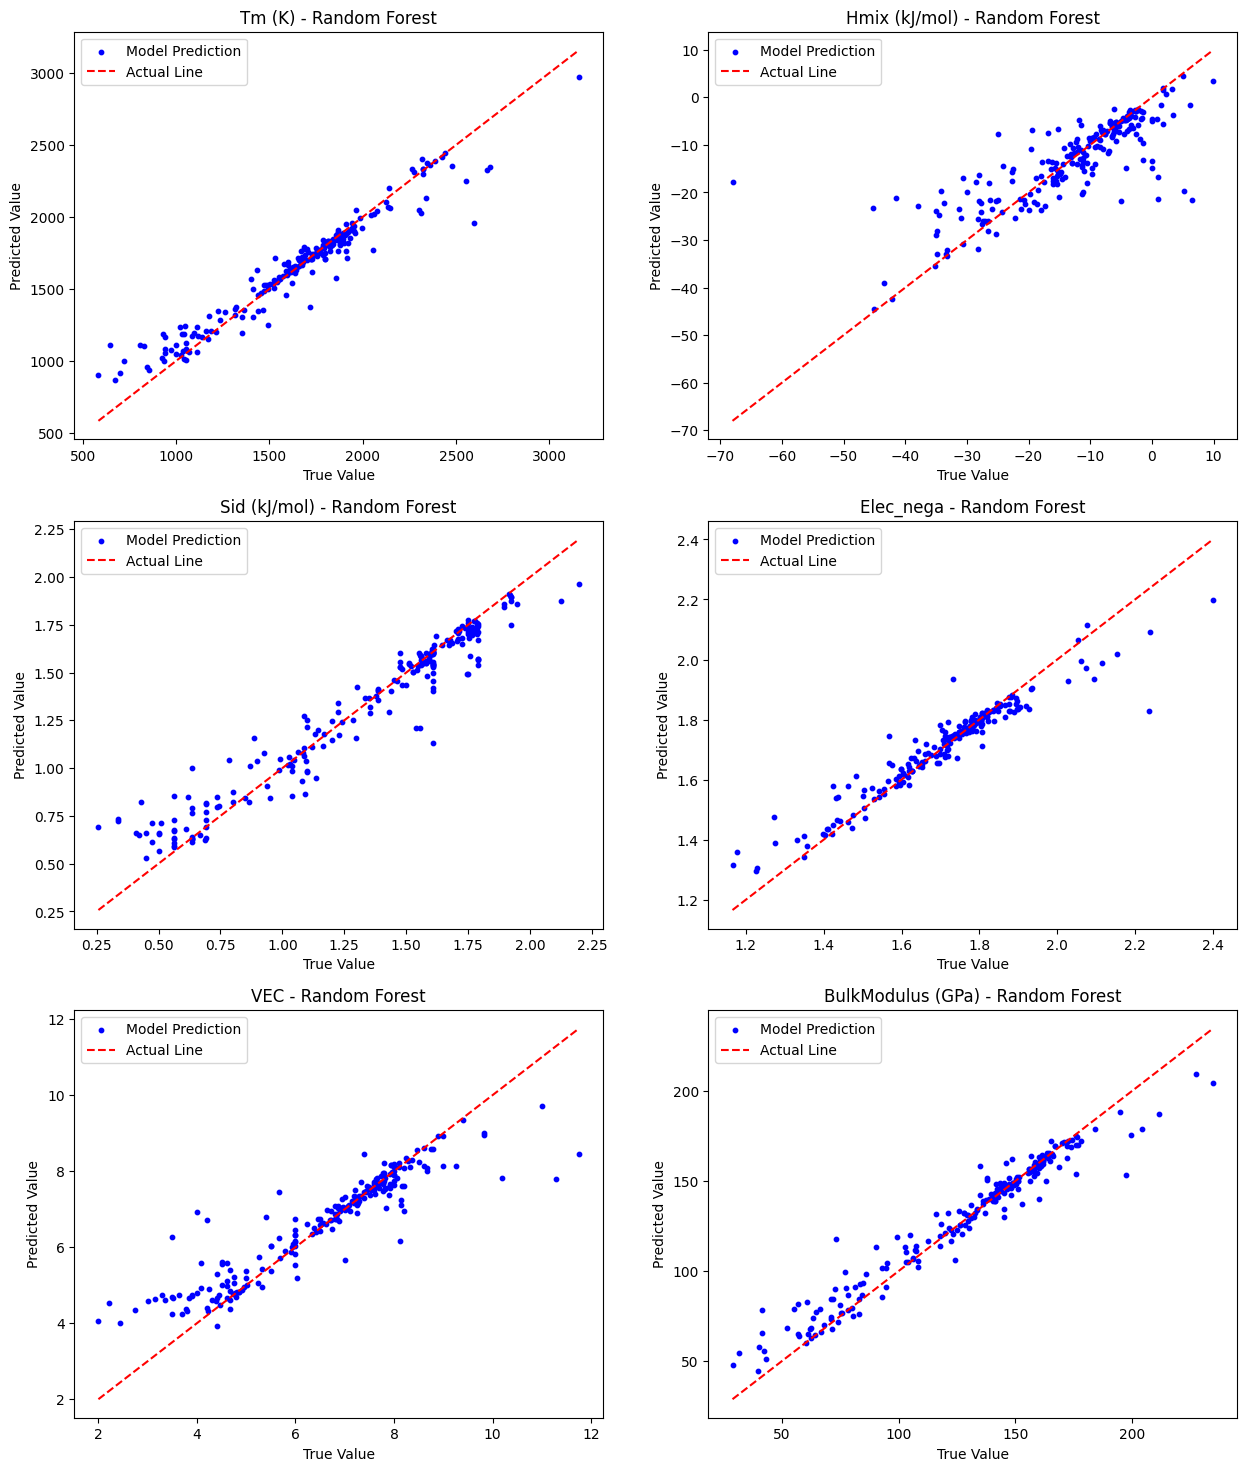

In [ ]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_rf], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - Random Forest')
  plt.legend()

plt.show()

## Extreme Gradient Boosting

In [ ]:
xgb_model = XGBRegressor(objective ='reg:squarederror',n_estimators=200, reg_lambda=1, gamma=0,max_depth=3, learning_rate=0.1, reg_alpha=0.1, seed = 123)
xgb_model.fit(X_train, Y_train)

# Evaluate the model
print("Training accuracy: %.2f" %(train_accuracy))
print("Test accuracy: %.2f" %(test_accuracy))

Y_pred_xgb = xgb_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_xgb)
test_mae = mean_absolute_error(Y_test, Y_pred_xgb)
print("RF MSE: %.2f" %(test_mse))
print("RF MAE: %.2f" %(test_mae))
print("RF RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.73
Test accuracy: 0.30
RF MSE: 2975.85
RF MAE: 15.09
RF RMSE: 54.55


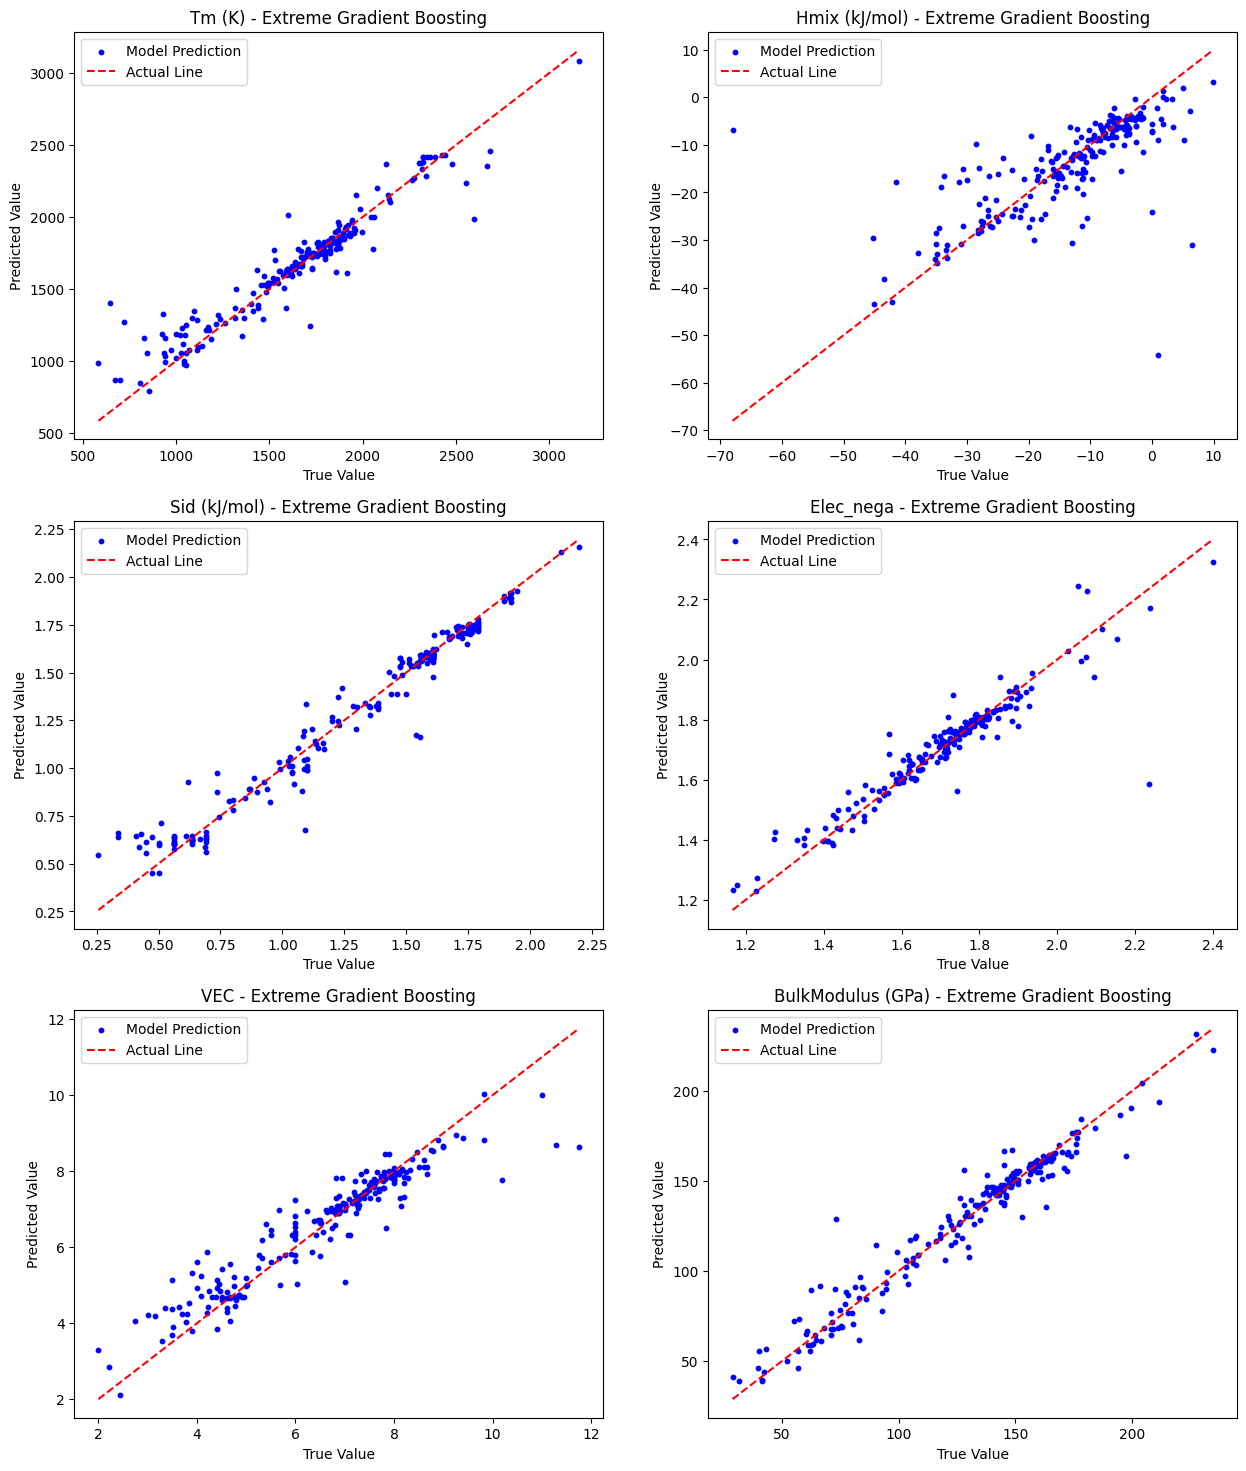

In [ ]:
plt.figure(figsize=(15,18))

for i in range(0,6):
  plt.subplot(3,2,i+1)
  plt.scatter(Y_test[y_col[i]], [a[i] for a in Y_pred_xgb], s=10, color='blue', label='Model Prediction')
  plt.plot([min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], [min(Y_test[y_col[i]]), max(Y_test[y_col[i]])], color='red', linestyle='--', label='Actual Line')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.title(f'{y_col[i]} - Extreme Gradient Boosting')
  plt.legend()

plt.show()

# Summary of all models



| Regression Model (Only Atomic Composition) | Training Acc | Testing Acc |
|----------------------------------------------------|--------------|-------------|
| Neural Network     |              |            
| tanh               | 0.86         | 0.74      |                            
| relu               | -0.35        | -1.47     |
| identity           | 0.23         | -1.02     |
| logistic           | 0.94         | 0.85      |
| KNN                                                | 0.93         | 0.83        |
| Linear Regression                                  | 0.68         | 0.26        |
| Random Forest                                     | 0.68         | -7.13611E+15|
| Extreme Gradient Boosting                         | 0.68         | -7.13611E+15|

---
| Regression Model (Atomic Composition and Phases) | Training Acc | Testing Acc |
|----------------------------------------------------------------------|--------------|-------------|
| Neural Network                                                       | 0.9          | 0.83        |
| KNN                                                                  | 0.93         | 0.82        |
| Linear Regression                                                    | 0.73         | 0.3         |
| Random Forest                                                        | 0.73         | 0.3         |
| Extreme Gradient Boosting                                            | 0.73         | 0.3         |



# **Model to predict HEA composition from given target features**

## Here, we assign target variable values, like a target melting temp. of 900, target Hmix of -20, etc. and try to tailor-make a HEA from our models for that purpose.

## Defining Target Variables

In [ ]:
np.random.seed(123)

max_iter = 40
learning_rate = 1

target_tmk = 700
target_hmix = -20
target_sid = 1.25
target_bm = 120
target_en = 1.6
target_vec = 7

## Importing text file with atomic radii data
## The feature: average atomic radius is a simple average of the atomic radii of elements present in the HEA

In [ ]:
file_path = '/content/drive/My Drive/ME793/elementdata.csv'
element_data = pd.read_csv(file_path)
data
radii = element_data.iloc[:, 3]
radii

0     1.44
1     1.43
2     1.39
3     1.46
4     0.98
      ... 
73    1.41
74    1.78
75    1.94
76    1.38
77    1.60
Name: Unnamed: 3, Length: 78, dtype: float64

In [ ]:
y_col1 = ['Tm (K)', 'Hmix (kJ/mol)', 'Sid (kJ/mol)', 'BulkModulus (GPa)']
y_col2 = ['Elec_nega', 'VEC']
# Split data into features (X) and target (Y)
X = data.loc[:, 'Ag':'Zr'].join(data.loc[:, ['No', 'a (Å)']])
Y1 = data[y_col1]
Y2 = data[y_col2]
X

Ag   Al  As  Au    B  Ba   Be  Bi  Br    C  ...  Tl  Tm     V    W  \
0     2.0  1.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
1     5.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
2     2.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
3     3.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
4     1.0  0.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
...   ...  ...  ..  ..  ...  ..  ...  ..  ..  ...  ...  ..  ..   ...  ...   
1098  0.0  2.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   1.0  0.0   
1099  0.0  6.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   1.0  0.0   
1100  0.0  1.0   0   0  0.0   0  0.0   0   0  0.0  ...   0   0   1.0  0.0   
1101  0.0  1.0   0   0  0.5   0  0.0   0   0  0.0  ...   0   0   0.0  0.0   
1102  0.0  0.4   0   0  0.0   0  0.0   0   0  0.0  ...   0   0  10.0  0.0   

        Y  Yb   Zn    Zr  No     a (Å)  
0     0.0   0  0.0   0.0   2  1.544000  
1     0.0   0  0.0   0.0   2  1.580308  
2     0.0   0  0.0   0.0   2  1.475200  
3     0.0   0  0.0   0.0   2  1.548000  
4     0.0   0  0.0   0.0   2  1.600750  
...   ...  ..  ...   ...  ..       ...  
1098  0.0   0  0.0   0.0   9  1.325700  
1099  0.0   0  0.0   0.0   9  1.356071  
1100  0.0   0  0.0   0.0   9  1.313889  
1101  0.0   0  0.0   0.0  10  1.282842  
1102  0.0   0  0.0  21.5  10  1.367130  

[1103 rows x 80 columns]

## Using the predictor models as a mix of NN and RF based on the earlier observed results

In [ ]:
# Initialize and train your neural network model
nn_model = MLPRegressor(activation='logistic', alpha=0.01, batch_size = 2, max_iter=10000, random_state=42)
nn_model.fit(X, Y1)

MLPRegressor(activation='logistic', alpha=0.01, batch_size=2, max_iter=10000,
             random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=500, criterion='squared_error', max_depth=150, min_samples_split=4,
                                  min_samples_leaf=2, max_features='sqrt', bootstrap=True, oob_score=True, n_jobs=-1,
                                  random_state=42, verbose=0, max_samples=None)
rf_model.fit(X, Y2)

RandomForestRegressor(max_depth=150, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=42)

In [ ]:
X = [np.zeros(80, dtype = float)]

## Creating a function that determines the average atomic radius and the number of unique elements in the input array

In [ ]:
def X_check(X):
  X[0][78] = 0
  X[0][79] = 0
  count = 0

  for i in range(78):
    if X[0][i] != 0:
      X[0][79] += 1
      count += 1
      X[0][78] += radii[i]*X[0][i]
  if count != 0:
    X[0][78] /= count
  return X

## Creating a function that computes the error in the measurement- This function can be modified to achieve more accuracy in a certain property compared to others. Division by the square of that property is done to reduce model bias towards one feature with large value

In [ ]:
def err(X):
  nn = np.array(nn_model.predict(X), dtype = float)
  rf = np.array(rf_model.predict(X), dtype = float)

  error = float(((nn[0][0] - target_tmk)/target_tmk)**2 + ((nn[0][1] - target_hmix)/target_hmix)**2 + ((nn[0][2] - target_sid)/target_sid)**2 + ((nn[0][3] - target_bm)/target_bm)**2 + ((rf[0][0] - target_en)/target_en)**2 + ((rf[0][1] - target_vec)/target_vec)**2)

  return error

## HEA composition prediction function inspired by the 'Pocket' algorithm, where a change is made if and only if it contributes to a reduction in error. We scan through all possible elements and see if adding one atom will reduce the error. This algorithm is 'greedy' in its approach.

In [ ]:
for i in range(max_iter):
  X = X_check(X)

  pred = nn_model.predict(X)

  error = err(X)
  if(i%10 == 0):
    print(X)
  print("Iteration: ", i, "Squared error: ", error)

  for j in range(78):
    Y = X

    if(Y[0][j] <= 5):
      Y[0][j] += 1
      if(err(X_check(Y)) < error):
        X = Y
        error = err(X_check(Y))
        break
      else:
        Y[0][j] -= 1

    if(Y[0][j] >= 1):
      Y[0][j] -= 1
      if(err(X_check(Y)) < error):
        X = Y
        error = err(X_check(Y))
      else:
        Y[0][j] += 1

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
Iteration:  0 Squared error:  3.28973624661197
Iteration:  1 Squared error:  2.3507743115657718
Iteration:  2 Squared error:  2.2106926701818024
Iteration:  3 Squared error:  2.038781556553267
Iteration:  4 Squared error:  1.9055122707374996
Iteration:  5 Squared error:  1.8099957588278335
Iteration:  6 Squared error:  1.7363669957403784
Iteration:  7 Squared error:  1.4721236150473784
Iteration:  8 Squared error:  1.295750406762615
Iteration:  9 Squared error:  1.0474243337448084
[array([3.  , 4.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.

## Display of performance: The melting temperature is far from the required value: because of its large numerical value. This can be corrected by assigning a larger weight to it in the error function

In [ ]:
nn = nn_model.predict(X)
rf = rf_model.predict(X)
print("Melting Point of Target: ", round(nn[0][0], 2), "Required Melting Point: ", target_tmk)
print("Hmix of Target: ", round(nn[0][1], 2), "Required Hmix: ", target_hmix)
print("Entopy of Target: ", round(nn[0][2], 2), "Required Entropy", target_sid)
print("Bulk Modulus of Target: ", round(nn[0][3], 2), "Required Bulk Modulus: ", target_bm)
print("Electronegativity of Target: ", round(rf[0][0], 2), "Required Electronegativity: ", target_en)
print("VEC of Target: ", round(rf[0][1], 2), "Required VEC: ", target_vec)

Melting Point of Target:  902.87 Required Melting Point:  700
Hmix of Target:  -17.97 Required Hmix:  -20
Entopy of Target:  0.97 Required Entropy 1.25
Bulk Modulus of Target:  69.32 Required Bulk Modulus:  120
Electronegativity of Target:  1.58 Required Electronegativity:  1.6
VEC of Target:  6.61 Required VEC:  7
